### Decision Tree ###

In [17]:
import pandas as pd

In [18]:
#df = pd.read_csv("../data/kickstarter_cleaned.csv")
df = pd.read_csv("../data/kickstarter_one_hot_cleaned.csv")

In [19]:
#one-hot encode

#category
df_encoded = pd.get_dummies(df, columns=['category'])

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#eliminate all non-numerical columns
df = df.select_dtypes(include=['number'])
df.drop([
    'usd_pledged', 'goal'
], axis=1)

#print(df.columns)
#print(df.head(2))

#y is the target feature
y = df['SuccessfulBool']
#X consists of all features other than the target feature
X = df.drop('SuccessfulBool', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

spotlight                      1.0
goal                           0.0
launched_at_day                0.0
world                          0.0
new                            0.0
help                           0.0
app                            0.0
DeadlineWeekend                0.0
LaunchedTuesday                0.0
TOPCOUNTRY                     0.0
launch_to_state_change_days    0.0
launch_to_deadline_days        0.0
create_to_launch_days          0.0
launched_at_hr                 0.0
launched_at_yr                 0.0
launched_at_month              0.0
disable_communication          0.0
created_at_hr                  0.0
created_at_day                 0.0
created_at_month               0.0
deadline_hr                    0.0
deadline_day                   0.0
deadline_month                 0.0
blurb_len_clean                0.0
name_len_clean                 0.0
usd_pledged                    0.0
static_usd_rate                0.0
backers_count                  0.0
staff_pick          

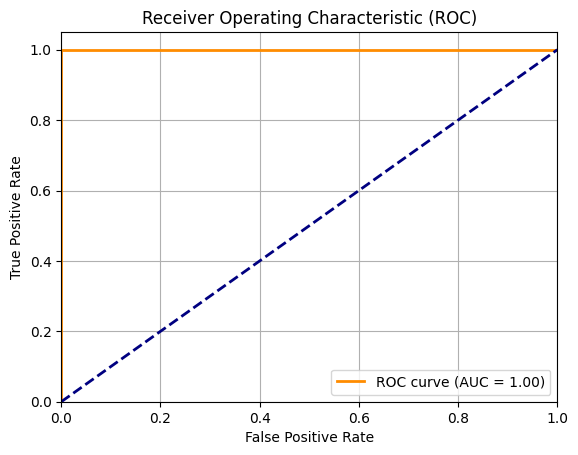

spotlight                      1.0
goal                           0.0
launched_at_day                0.0
world                          0.0
new                            0.0
help                           0.0
app                            0.0
DeadlineWeekend                0.0
LaunchedTuesday                0.0
TOPCOUNTRY                     0.0
launch_to_state_change_days    0.0
launch_to_deadline_days        0.0
create_to_launch_days          0.0
launched_at_hr                 0.0
launched_at_yr                 0.0
launched_at_month              0.0
disable_communication          0.0
created_at_hr                  0.0
created_at_day                 0.0
created_at_month               0.0
deadline_hr                    0.0
deadline_day                   0.0
deadline_month                 0.0
blurb_len_clean                0.0
name_len_clean                 0.0
usd_pledged                    0.0
static_usd_rate                0.0
backers_count                  0.0
staff_pick          

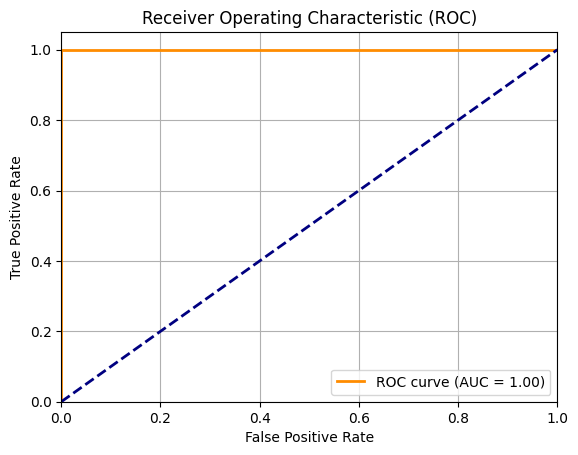

spotlight                      1.0
goal                           0.0
launched_at_day                0.0
world                          0.0
new                            0.0
help                           0.0
app                            0.0
DeadlineWeekend                0.0
LaunchedTuesday                0.0
TOPCOUNTRY                     0.0
launch_to_state_change_days    0.0
launch_to_deadline_days        0.0
create_to_launch_days          0.0
launched_at_hr                 0.0
launched_at_yr                 0.0
launched_at_month              0.0
disable_communication          0.0
created_at_hr                  0.0
created_at_day                 0.0
created_at_month               0.0
deadline_hr                    0.0
deadline_day                   0.0
deadline_month                 0.0
blurb_len_clean                0.0
name_len_clean                 0.0
usd_pledged                    0.0
static_usd_rate                0.0
backers_count                  0.0
staff_pick          

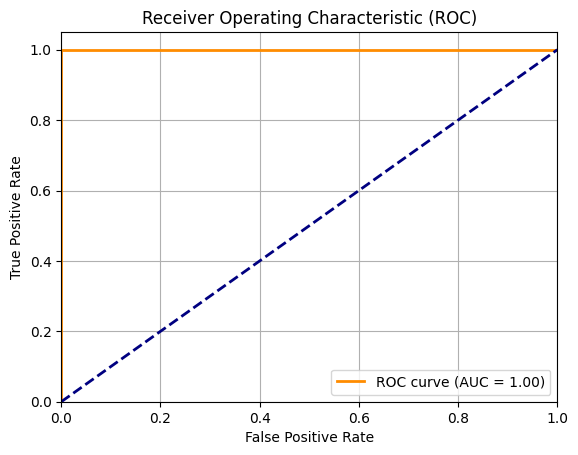

spotlight                      1.0
goal                           0.0
launched_at_day                0.0
world                          0.0
new                            0.0
help                           0.0
app                            0.0
DeadlineWeekend                0.0
LaunchedTuesday                0.0
TOPCOUNTRY                     0.0
launch_to_state_change_days    0.0
launch_to_deadline_days        0.0
create_to_launch_days          0.0
launched_at_hr                 0.0
launched_at_yr                 0.0
launched_at_month              0.0
disable_communication          0.0
created_at_hr                  0.0
created_at_day                 0.0
created_at_month               0.0
deadline_hr                    0.0
deadline_day                   0.0
deadline_month                 0.0
blurb_len_clean                0.0
name_len_clean                 0.0
usd_pledged                    0.0
static_usd_rate                0.0
backers_count                  0.0
staff_pick          

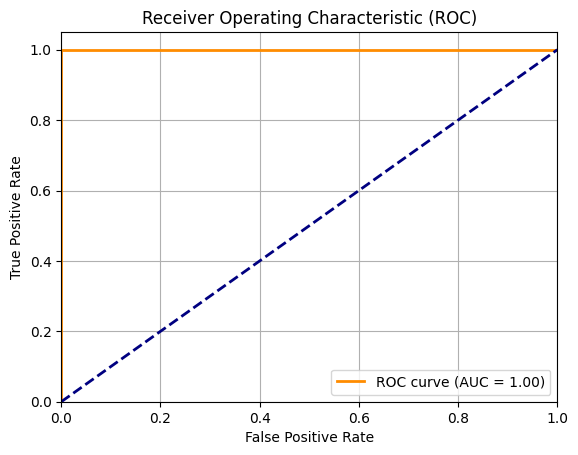

In [21]:
for i in range(1, 5):
    clf = DecisionTreeClassifier(max_depth=i, random_state=42)
    clf.fit(X_train, y_train)

    cv_scores = cross_val_score(clf, X, y, cv=10)

    #examine the feature importance
    importances = clf.feature_importances_
    feature_ranks = pd.Series(importances, index=X.columns).sort_values(ascending=False)
    print(feature_ranks)
    #split_feature_index = clf.tree_.feature[0]
    #print("Split on feature:", X.columns[split_feature_index])

    print(f"Tree depth {i}")
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean():.4f}")
    print(f"Standard deviation of accuracy: {cv_scores.std():.4f}")

    y_scores = clf.predict_proba(X_test)[:, 1]  # Get probability for the positive class

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Chance line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
        

In [22]:
#messing around with sample prediction
print(clf.predict(X.iloc[0:1]))

[0]


`Spotlight` is a problem here. It seems that the target is leaked to the training by the `spotlight`. Looking more into it, the spotlight on kickstarter features projects that were already successful. E.g. only a successful kickstarter will reach the kickstarter spotlight.

We need to omit the spotlight feature to avoid leakage of the target feature to the training data.

Re-reading the assignment, only launch day data should be used for predictions so more features should be omitted.

In [23]:
#drop spotlight and any other features that will leak

features_to_drop = ['usd_pledged', 'state_changed_at', 'staff_pick', 'backers_count', 'spotlight', 'launch_to_state_change_days', 'state_changed_at_weekday_Friday', 'state_changed_at_weekday_Monday', 'state_changed_at_weekday_Saturday', 'state_changed_at_weekday_Sunday', 'state_changed_at_weekday_Thursday', 'state_changed_at_weekday_Tuesday', 'state_changed_at_weekday_Wednesday']
print(df.columns.to_list())

def safe_drop_columns(df, features_to_drop):
    for column in features_to_drop:
        if column in df.columns.tolist():
            df.drop(column, axis=1, inplace=True)
safe_drop_columns(df, features_to_drop)

#print(df.columns)

#print('usd_pledged' in df.columns)

#y is the target feature
y = df['SuccessfulBool']
#X consists of all features other than the target feature
X = df.drop('SuccessfulBool', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

['goal', 'disable_communication', 'staff_pick', 'backers_count', 'static_usd_rate', 'usd_pledged', 'spotlight', 'name_len_clean', 'blurb_len_clean', 'deadline_month', 'deadline_day', 'deadline_hr', 'created_at_month', 'created_at_day', 'created_at_hr', 'launched_at_month', 'launched_at_day', 'launched_at_yr', 'launched_at_hr', 'create_to_launch_days', 'launch_to_deadline_days', 'launch_to_state_change_days', 'SuccessfulBool', 'TOPCOUNTRY', 'LaunchedTuesday', 'DeadlineWeekend', 'app', 'help', 'new', 'world', 'canceled']


Tree depth 4
min_samples_leaf 2
goal                     0.588885
create_to_launch_days    0.230594
canceled                 0.180522
dtype: float64
Cross-validation scores: [0.58381783 0.70833333 0.70867668 0.70867668 0.63548231 0.70819195
 0.70819195 0.70819195 0.70819195 0.70819195]
Mean accuracy: 0.6886
Standard deviation of accuracy: 0.0411


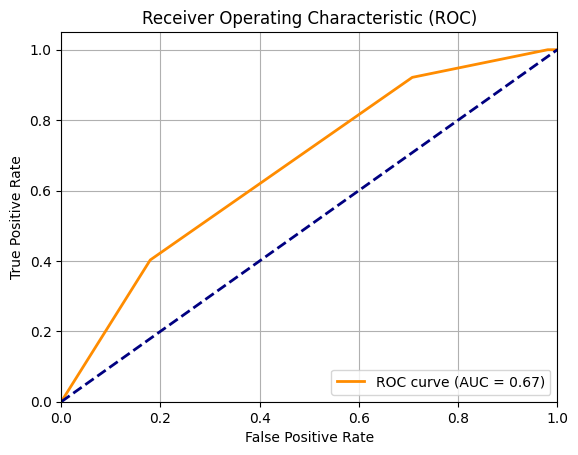

Tree depth 4
min_samples_leaf 3
goal                     0.588885
create_to_launch_days    0.230594
canceled                 0.180522
dtype: float64
Cross-validation scores: [0.58381783 0.70833333 0.70867668 0.70867668 0.63548231 0.70819195
 0.70819195 0.70819195 0.70819195 0.70819195]
Mean accuracy: 0.6886
Standard deviation of accuracy: 0.0411


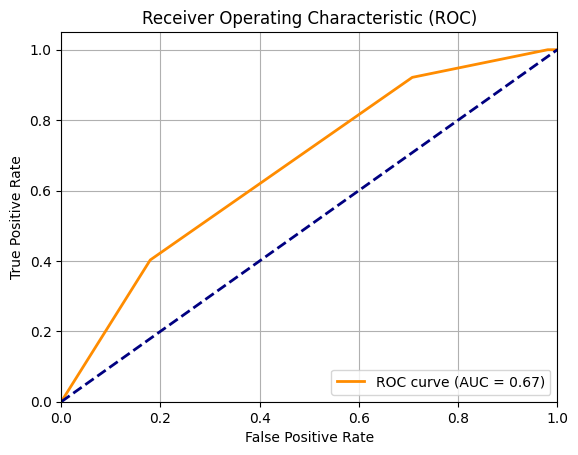

Tree depth 4
min_samples_leaf 4
goal                     0.588885
create_to_launch_days    0.230594
canceled                 0.180522
dtype: float64
Cross-validation scores: [0.58381783 0.70833333 0.70867668 0.70867668 0.63548231 0.70819195
 0.70819195 0.70819195 0.70819195 0.70819195]
Mean accuracy: 0.6886
Standard deviation of accuracy: 0.0411


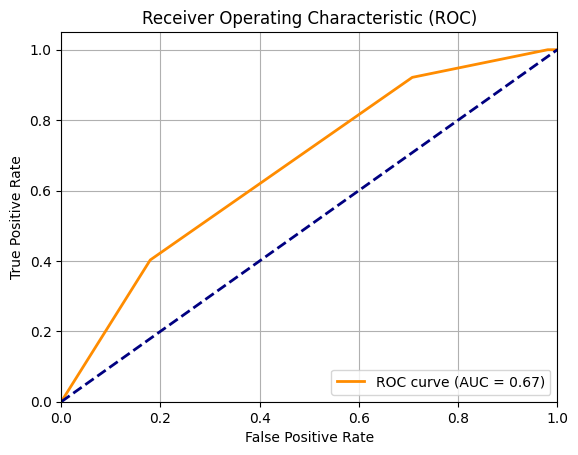

Tree depth 4
min_samples_leaf 5
goal                     0.588885
create_to_launch_days    0.230594
canceled                 0.180522
dtype: float64
Cross-validation scores: [0.58381783 0.70833333 0.70867668 0.70867668 0.63548231 0.70819195
 0.70819195 0.70819195 0.70819195 0.70819195]
Mean accuracy: 0.6886
Standard deviation of accuracy: 0.0411


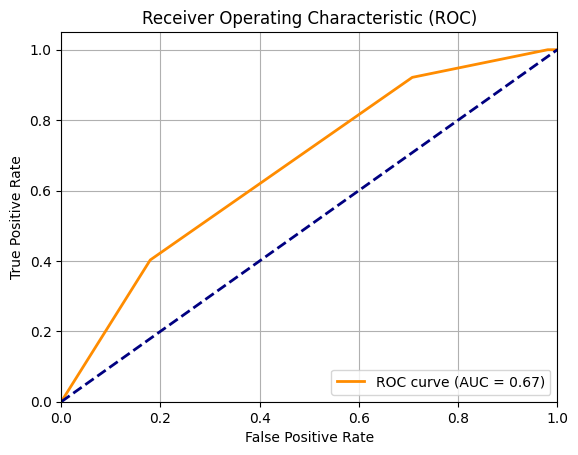

Tree depth 4
min_samples_leaf 6
goal                     0.588885
create_to_launch_days    0.230594
canceled                 0.180522
dtype: float64
Cross-validation scores: [0.58381783 0.70833333 0.70867668 0.70867668 0.63548231 0.70819195
 0.70819195 0.70819195 0.70819195 0.70819195]
Mean accuracy: 0.6886
Standard deviation of accuracy: 0.0411


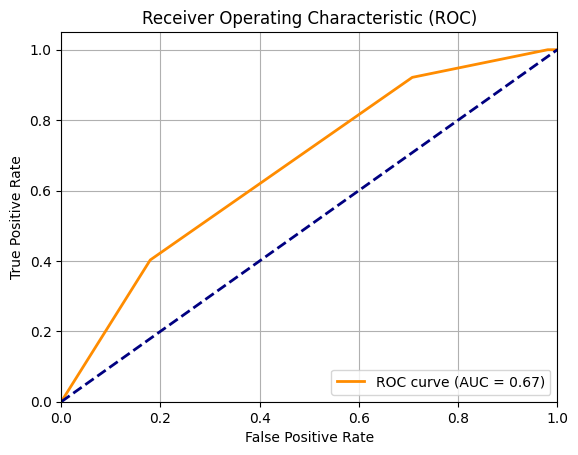

Tree depth 4
min_samples_leaf 7
goal                     0.588885
create_to_launch_days    0.230594
canceled                 0.180522
dtype: float64
Cross-validation scores: [0.58381783 0.70833333 0.70867668 0.70867668 0.63548231 0.70819195
 0.70819195 0.70819195 0.70819195 0.70819195]
Mean accuracy: 0.6886
Standard deviation of accuracy: 0.0411


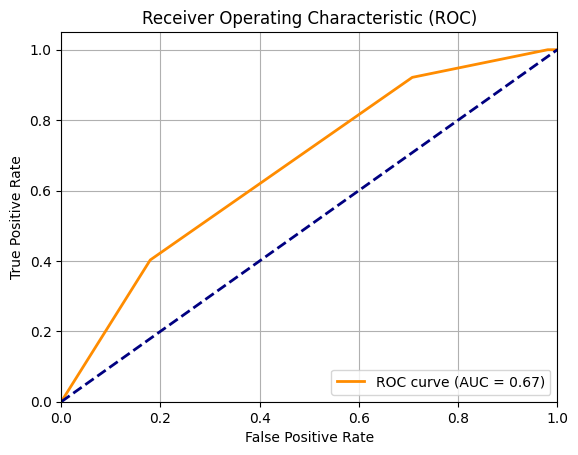

Tree depth 4
min_samples_leaf 8
goal                     0.588885
create_to_launch_days    0.230594
canceled                 0.180522
dtype: float64
Cross-validation scores: [0.58381783 0.70833333 0.70867668 0.70867668 0.63548231 0.70819195
 0.70819195 0.70819195 0.70819195 0.70819195]
Mean accuracy: 0.6886
Standard deviation of accuracy: 0.0411


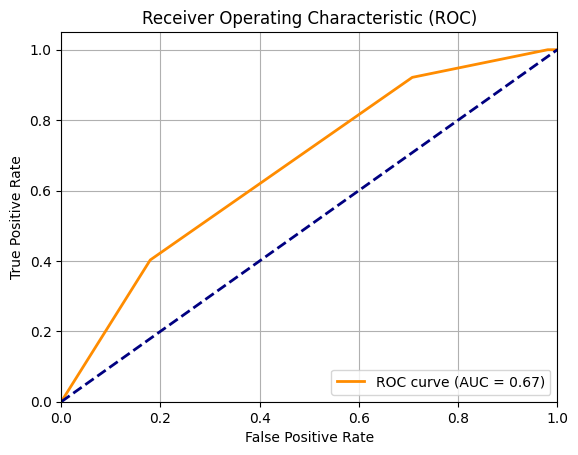

Tree depth 4
min_samples_leaf 9
goal                     0.588885
create_to_launch_days    0.230594
canceled                 0.180522
dtype: float64
Cross-validation scores: [0.58381783 0.70833333 0.70867668 0.70867668 0.63548231 0.70819195
 0.70819195 0.70819195 0.70819195 0.70819195]
Mean accuracy: 0.6886
Standard deviation of accuracy: 0.0411


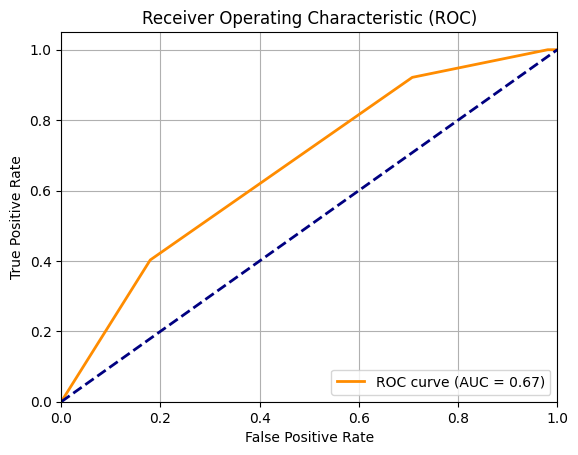

Tree depth 4
min_samples_leaf 10
goal                     0.588885
create_to_launch_days    0.230594
canceled                 0.180522
dtype: float64
Cross-validation scores: [0.58381783 0.70833333 0.70867668 0.70867668 0.63548231 0.70819195
 0.70819195 0.70819195 0.70819195 0.70819195]
Mean accuracy: 0.6886
Standard deviation of accuracy: 0.0411


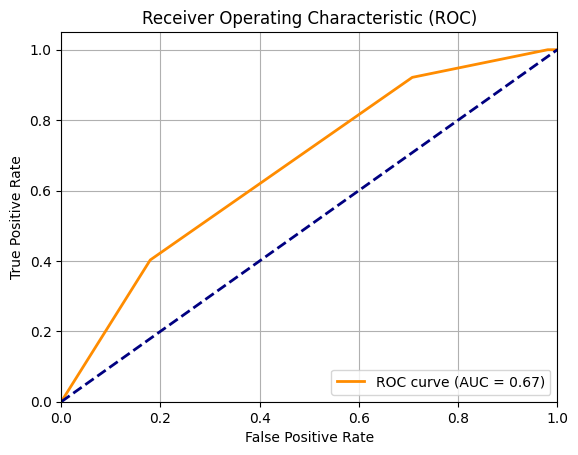

Tree depth 4
min_samples_leaf 11
goal                     0.588885
create_to_launch_days    0.230594
canceled                 0.180522
dtype: float64
Cross-validation scores: [0.58381783 0.70833333 0.70867668 0.70867668 0.63548231 0.70819195
 0.70819195 0.70819195 0.70819195 0.70819195]
Mean accuracy: 0.6886
Standard deviation of accuracy: 0.0411


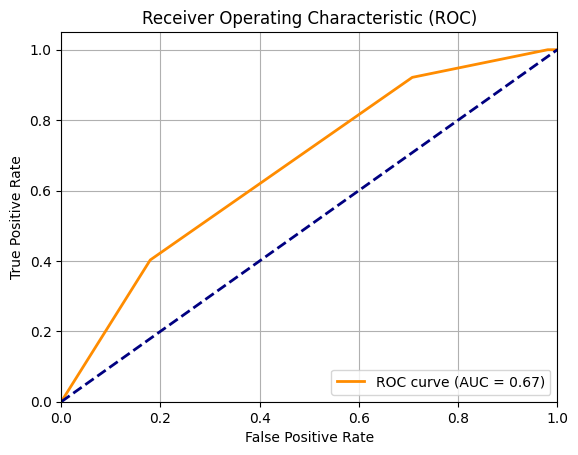

Tree depth 4
min_samples_leaf 12
goal                     0.588885
create_to_launch_days    0.230594
canceled                 0.180522
dtype: float64
Cross-validation scores: [0.58381783 0.70833333 0.70867668 0.70867668 0.63548231 0.70819195
 0.70819195 0.70819195 0.70819195 0.70819195]
Mean accuracy: 0.6886
Standard deviation of accuracy: 0.0411


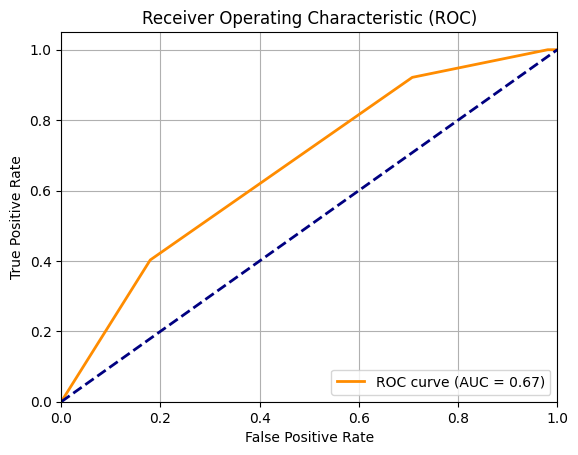

Tree depth 4
min_samples_leaf 13
goal                     0.588885
create_to_launch_days    0.230594
canceled                 0.180522
dtype: float64
Cross-validation scores: [0.58381783 0.70833333 0.70867668 0.70867668 0.63548231 0.70819195
 0.70819195 0.70819195 0.70819195 0.70819195]
Mean accuracy: 0.6886
Standard deviation of accuracy: 0.0411


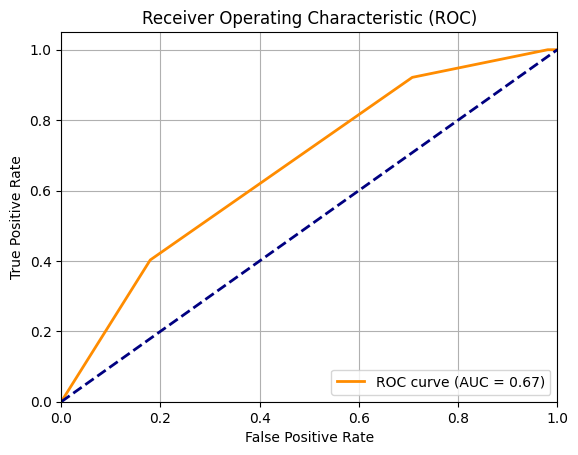

Tree depth 4
min_samples_leaf 14
goal                     0.588885
create_to_launch_days    0.230594
canceled                 0.180522
dtype: float64
Cross-validation scores: [0.58381783 0.70833333 0.70867668 0.70867668 0.63548231 0.70819195
 0.70819195 0.70819195 0.70819195 0.70819195]
Mean accuracy: 0.6886
Standard deviation of accuracy: 0.0411


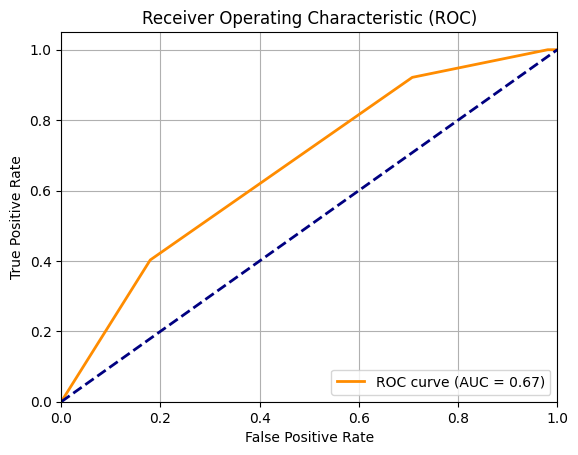

Tree depth 4
min_samples_leaf 2
goal                     0.454356
canceled                 0.281414
create_to_launch_days    0.239382
launched_at_yr           0.024848
dtype: float64
Cross-validation scores: [0.68362403 0.74273256 0.7401842  0.78962676 0.68153175 0.71061561
 0.7120698  0.71449346 0.73533689 0.71546292]
Mean accuracy: 0.7226
Standard deviation of accuracy: 0.0299


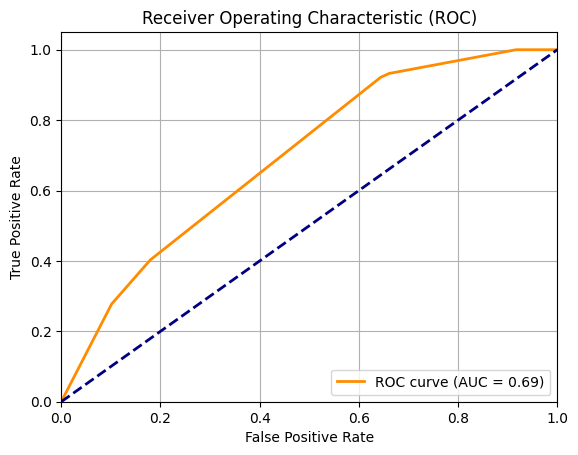

Tree depth 4
min_samples_leaf 3
goal                     0.454356
canceled                 0.281414
create_to_launch_days    0.239382
launched_at_yr           0.024848
dtype: float64
Cross-validation scores: [0.68362403 0.74273256 0.7401842  0.78962676 0.68153175 0.71061561
 0.7120698  0.71449346 0.73533689 0.71546292]
Mean accuracy: 0.7226
Standard deviation of accuracy: 0.0299


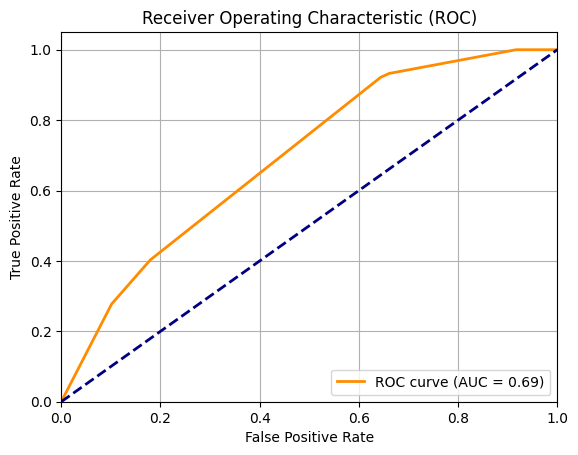

Tree depth 4
min_samples_leaf 4
goal                     0.454356
canceled                 0.281414
create_to_launch_days    0.239382
launched_at_yr           0.024848
dtype: float64
Cross-validation scores: [0.68362403 0.74273256 0.7401842  0.78962676 0.68153175 0.71061561
 0.7120698  0.71449346 0.73533689 0.71546292]
Mean accuracy: 0.7226
Standard deviation of accuracy: 0.0299


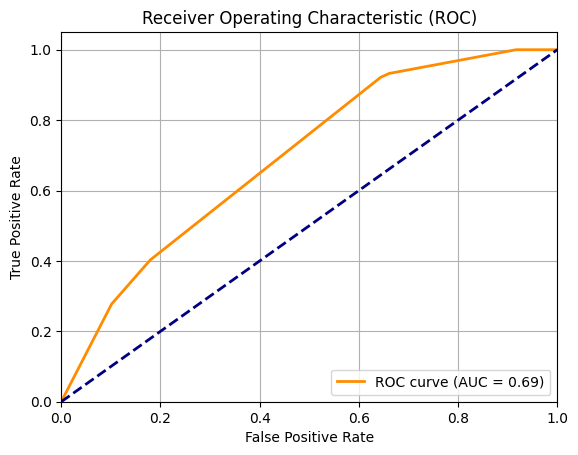

Tree depth 4
min_samples_leaf 5
goal                     0.454356
canceled                 0.281414
create_to_launch_days    0.239382
launched_at_yr           0.024848
dtype: float64
Cross-validation scores: [0.68362403 0.74273256 0.7401842  0.78962676 0.68153175 0.71061561
 0.7120698  0.71449346 0.73533689 0.71546292]
Mean accuracy: 0.7226
Standard deviation of accuracy: 0.0299


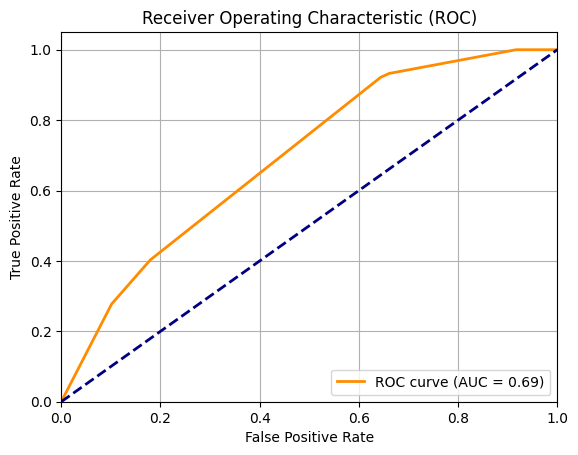

Tree depth 4
min_samples_leaf 6
goal                     0.454356
canceled                 0.281414
create_to_launch_days    0.239382
launched_at_yr           0.024848
dtype: float64
Cross-validation scores: [0.68362403 0.74273256 0.7401842  0.78962676 0.68153175 0.71061561
 0.7120698  0.71449346 0.73533689 0.71546292]
Mean accuracy: 0.7226
Standard deviation of accuracy: 0.0299


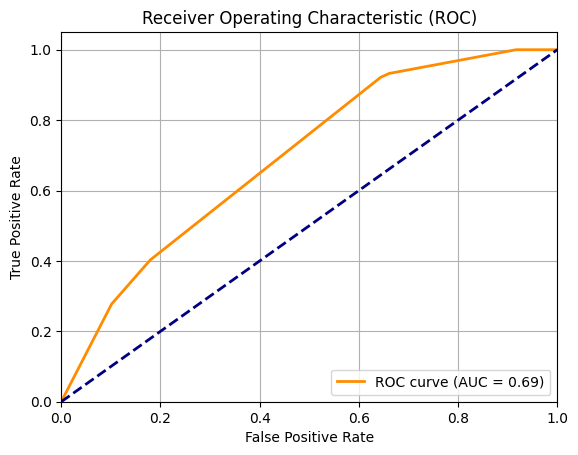

Tree depth 4
min_samples_leaf 7
goal                     0.454356
canceled                 0.281414
create_to_launch_days    0.239382
launched_at_yr           0.024848
dtype: float64
Cross-validation scores: [0.68362403 0.74273256 0.7401842  0.78962676 0.68153175 0.71061561
 0.7120698  0.71449346 0.73533689 0.71546292]
Mean accuracy: 0.7226
Standard deviation of accuracy: 0.0299


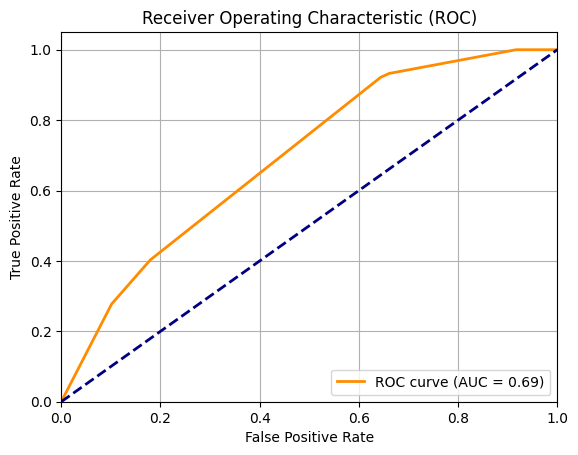

Tree depth 4
min_samples_leaf 8
goal                     0.454356
canceled                 0.281414
create_to_launch_days    0.239382
launched_at_yr           0.024848
dtype: float64
Cross-validation scores: [0.68362403 0.74273256 0.7401842  0.78962676 0.68153175 0.71061561
 0.7120698  0.71449346 0.73533689 0.71546292]
Mean accuracy: 0.7226
Standard deviation of accuracy: 0.0299


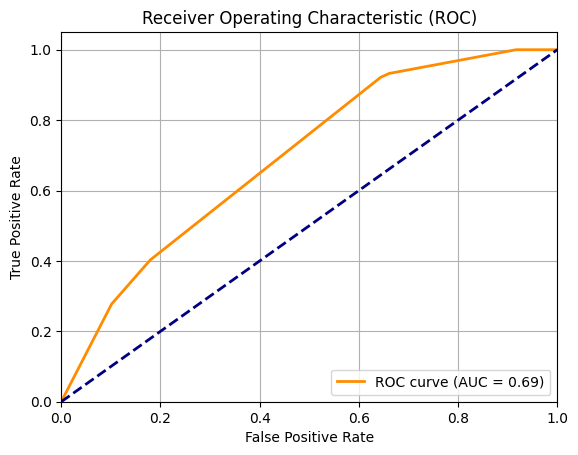

Tree depth 4
min_samples_leaf 9
goal                     0.454356
canceled                 0.281414
create_to_launch_days    0.239382
launched_at_yr           0.024848
dtype: float64
Cross-validation scores: [0.68362403 0.74273256 0.7401842  0.78962676 0.68153175 0.71061561
 0.7120698  0.71449346 0.73533689 0.71546292]
Mean accuracy: 0.7226
Standard deviation of accuracy: 0.0299


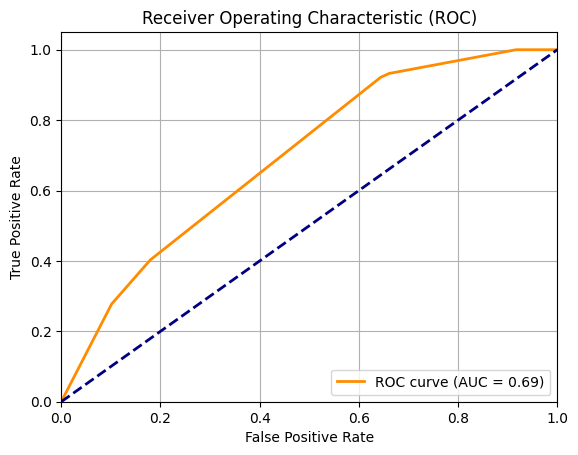

Tree depth 4
min_samples_leaf 10
goal                     0.454356
canceled                 0.281414
create_to_launch_days    0.239382
launched_at_yr           0.024848
dtype: float64
Cross-validation scores: [0.68362403 0.74273256 0.7401842  0.78962676 0.68153175 0.71061561
 0.7120698  0.71449346 0.73533689 0.71546292]
Mean accuracy: 0.7226
Standard deviation of accuracy: 0.0299


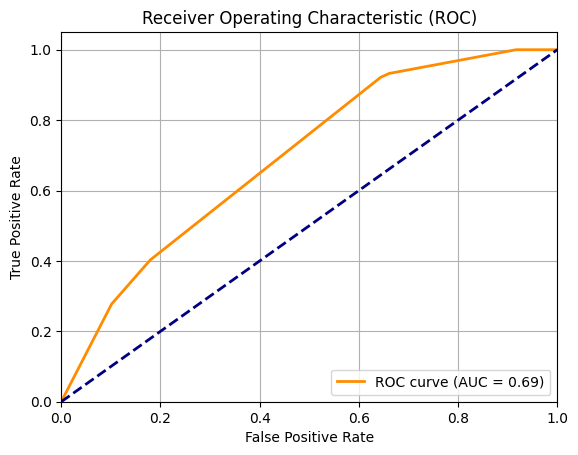

Tree depth 4
min_samples_leaf 11
goal                     0.454356
canceled                 0.281414
create_to_launch_days    0.239382
launched_at_yr           0.024848
dtype: float64
Cross-validation scores: [0.68362403 0.74273256 0.7401842  0.78962676 0.68153175 0.71061561
 0.7120698  0.71449346 0.73533689 0.71546292]
Mean accuracy: 0.7226
Standard deviation of accuracy: 0.0299


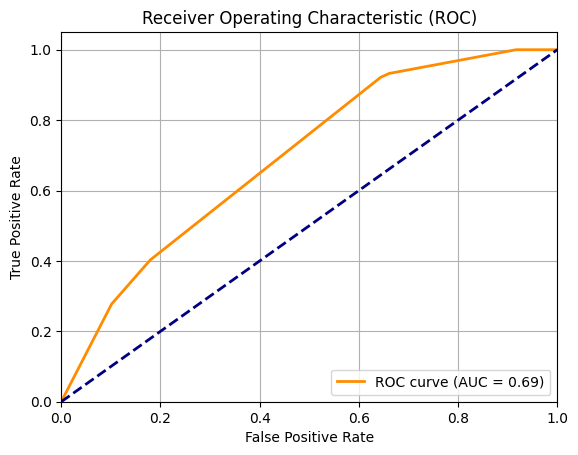

Tree depth 4
min_samples_leaf 12
goal                     0.454356
canceled                 0.281414
create_to_launch_days    0.239382
launched_at_yr           0.024848
dtype: float64
Cross-validation scores: [0.68362403 0.74273256 0.7401842  0.78962676 0.68153175 0.71061561
 0.7120698  0.71449346 0.73533689 0.71546292]
Mean accuracy: 0.7226
Standard deviation of accuracy: 0.0299


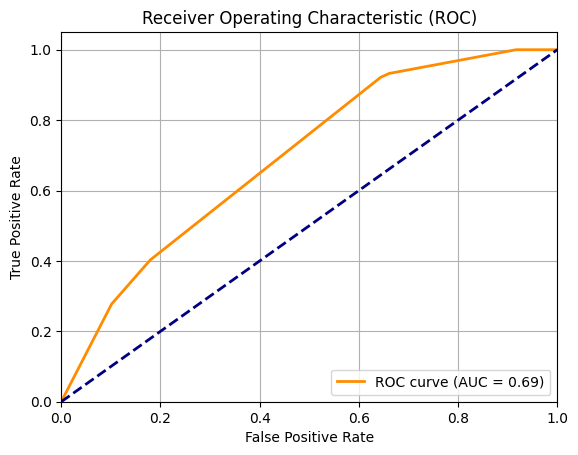

Tree depth 4
min_samples_leaf 13
goal                     0.454356
canceled                 0.281414
create_to_launch_days    0.239382
launched_at_yr           0.024848
dtype: float64
Cross-validation scores: [0.68362403 0.74273256 0.7401842  0.78962676 0.68153175 0.71061561
 0.7120698  0.71449346 0.73533689 0.71546292]
Mean accuracy: 0.7226
Standard deviation of accuracy: 0.0299


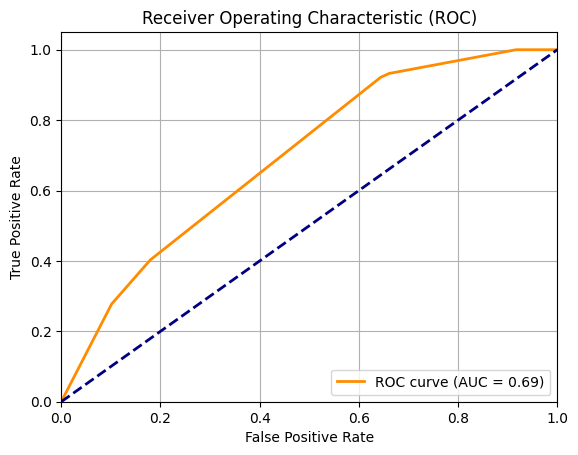

Tree depth 4
min_samples_leaf 14
goal                     0.454356
canceled                 0.281414
create_to_launch_days    0.239382
launched_at_yr           0.024848
dtype: float64
Cross-validation scores: [0.68362403 0.74273256 0.7401842  0.78962676 0.68153175 0.71061561
 0.7120698  0.71449346 0.73533689 0.71546292]
Mean accuracy: 0.7226
Standard deviation of accuracy: 0.0299


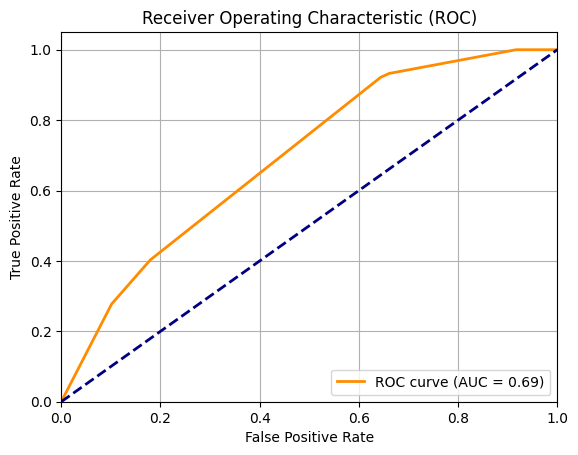

Tree depth 4
min_samples_leaf 2
goal                       0.479314
canceled                   0.243681
create_to_launch_days      0.207285
launched_at_yr             0.041241
launch_to_deadline_days    0.028479
dtype: float64
Cross-validation scores: [0.64631783 0.75920543 0.75860397 0.7527872  0.68201648 0.74212312
 0.59912748 0.72952012 0.73630635 0.71691711]
Mean accuracy: 0.7123
Standard deviation of accuracy: 0.0508


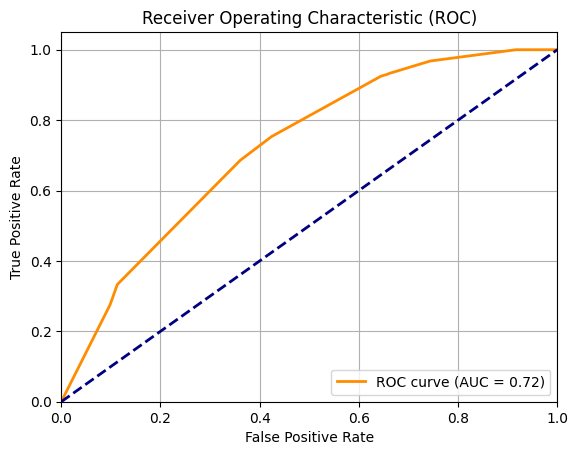

Tree depth 4
min_samples_leaf 3
goal                       0.479314
canceled                   0.243681
create_to_launch_days      0.207285
launched_at_yr             0.041241
launch_to_deadline_days    0.028479
dtype: float64
Cross-validation scores: [0.64631783 0.75920543 0.75860397 0.7527872  0.68201648 0.74212312
 0.59912748 0.72952012 0.73630635 0.71691711]
Mean accuracy: 0.7123
Standard deviation of accuracy: 0.0508


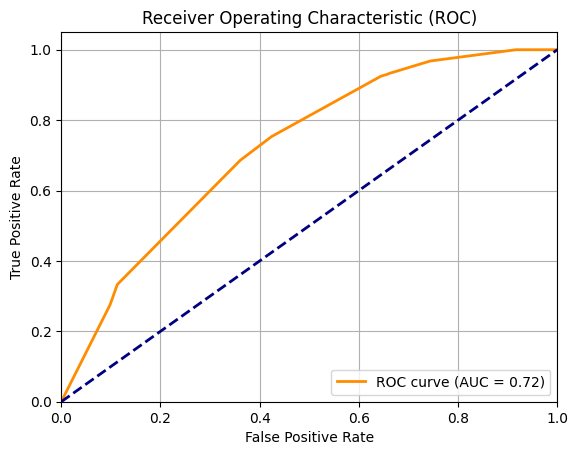

Tree depth 4
min_samples_leaf 4
goal                       0.479314
canceled                   0.243681
create_to_launch_days      0.207285
launched_at_yr             0.041241
launch_to_deadline_days    0.028479
dtype: float64
Cross-validation scores: [0.64631783 0.75920543 0.75860397 0.7527872  0.68201648 0.74212312
 0.59912748 0.72952012 0.73630635 0.71691711]
Mean accuracy: 0.7123
Standard deviation of accuracy: 0.0508


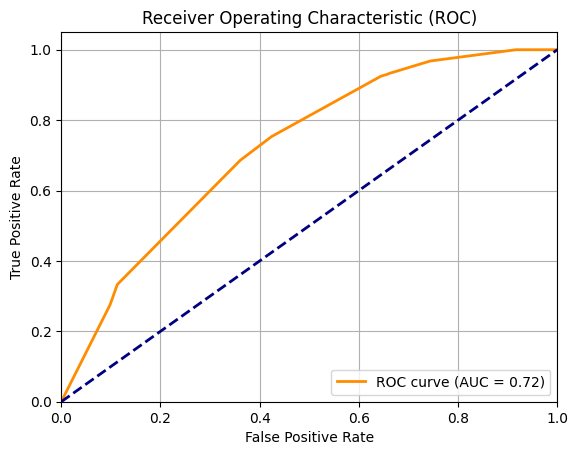

Tree depth 4
min_samples_leaf 5
goal                       0.479314
canceled                   0.243681
create_to_launch_days      0.207285
launched_at_yr             0.041241
launch_to_deadline_days    0.028479
dtype: float64
Cross-validation scores: [0.64631783 0.75920543 0.75860397 0.7527872  0.68201648 0.74212312
 0.59912748 0.72952012 0.73630635 0.71691711]
Mean accuracy: 0.7123
Standard deviation of accuracy: 0.0508


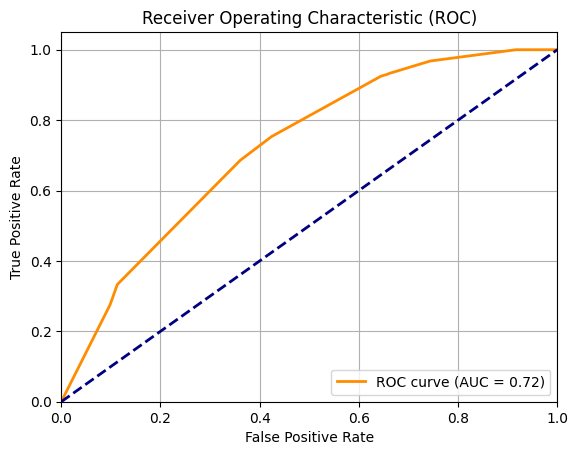

Tree depth 4
min_samples_leaf 6
goal                       0.479314
canceled                   0.243681
create_to_launch_days      0.207285
launched_at_yr             0.041241
launch_to_deadline_days    0.028479
dtype: float64
Cross-validation scores: [0.64631783 0.75920543 0.75860397 0.7527872  0.68201648 0.74212312
 0.59912748 0.72952012 0.73630635 0.71691711]
Mean accuracy: 0.7123
Standard deviation of accuracy: 0.0508


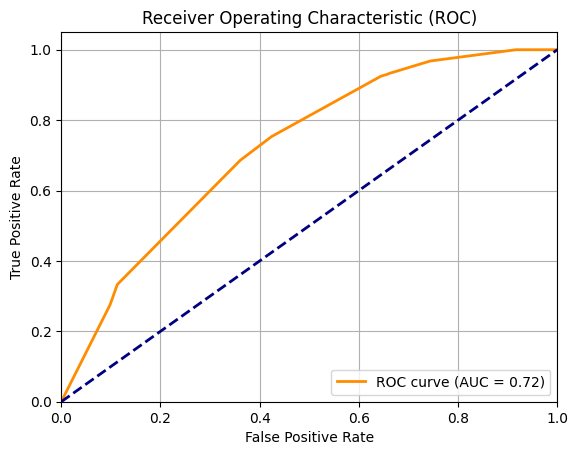

Tree depth 4
min_samples_leaf 7
goal                       0.479314
canceled                   0.243681
create_to_launch_days      0.207285
launched_at_yr             0.041241
launch_to_deadline_days    0.028479
dtype: float64
Cross-validation scores: [0.64631783 0.75920543 0.75860397 0.7527872  0.68201648 0.74212312
 0.59912748 0.72952012 0.73630635 0.71691711]
Mean accuracy: 0.7123
Standard deviation of accuracy: 0.0508


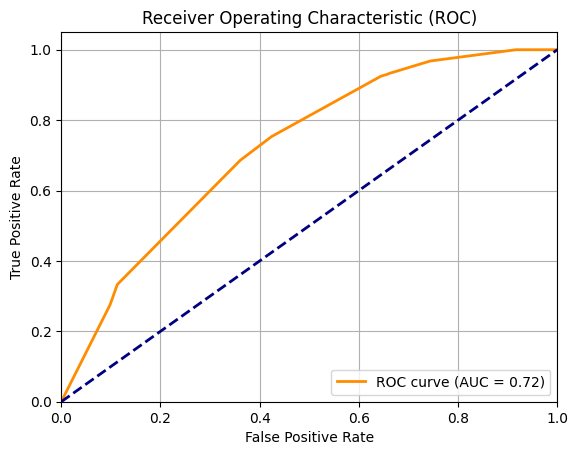

Tree depth 4
min_samples_leaf 8
goal                       0.479314
canceled                   0.243681
create_to_launch_days      0.207285
launched_at_yr             0.041241
launch_to_deadline_days    0.028479
dtype: float64
Cross-validation scores: [0.64631783 0.75920543 0.75860397 0.7527872  0.68201648 0.74212312
 0.59912748 0.72952012 0.73630635 0.71691711]
Mean accuracy: 0.7123
Standard deviation of accuracy: 0.0508


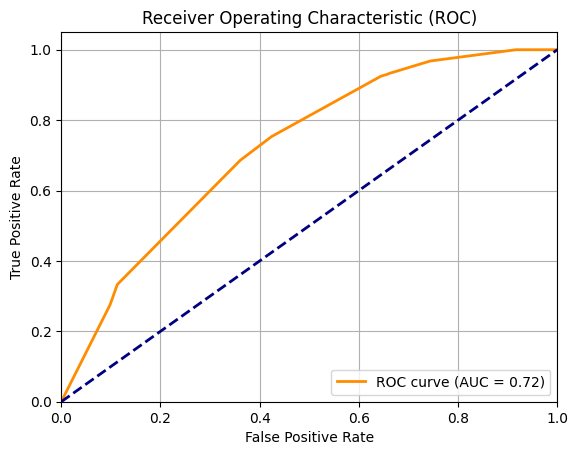

Tree depth 4
min_samples_leaf 9
goal                       0.479314
canceled                   0.243681
create_to_launch_days      0.207285
launched_at_yr             0.041241
launch_to_deadline_days    0.028479
dtype: float64
Cross-validation scores: [0.64631783 0.75920543 0.75860397 0.7527872  0.68201648 0.74212312
 0.59912748 0.72952012 0.73630635 0.71691711]
Mean accuracy: 0.7123
Standard deviation of accuracy: 0.0508


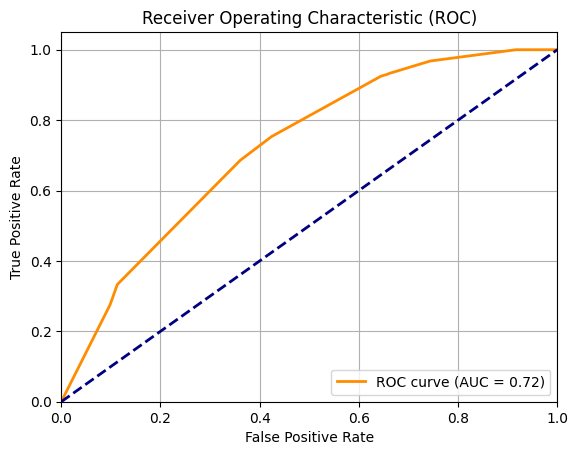

Tree depth 4
min_samples_leaf 10
goal                       0.479314
canceled                   0.243681
create_to_launch_days      0.207285
launched_at_yr             0.041241
launch_to_deadline_days    0.028479
dtype: float64
Cross-validation scores: [0.64631783 0.75920543 0.75860397 0.7527872  0.68201648 0.74212312
 0.59912748 0.72952012 0.73630635 0.71691711]
Mean accuracy: 0.7123
Standard deviation of accuracy: 0.0508


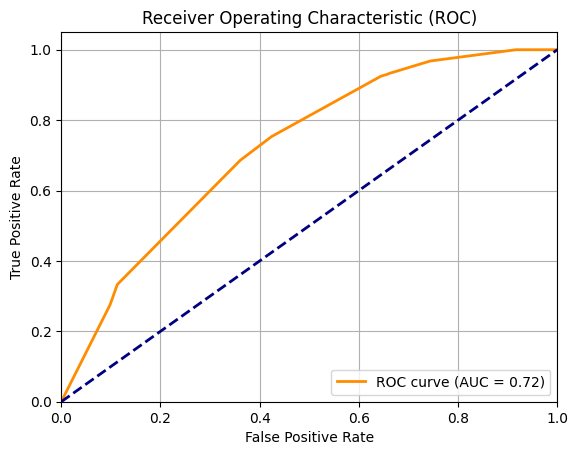

Tree depth 4
min_samples_leaf 11
goal                       0.479314
canceled                   0.243681
create_to_launch_days      0.207285
launched_at_yr             0.041241
launch_to_deadline_days    0.028479
dtype: float64
Cross-validation scores: [0.64631783 0.75920543 0.75860397 0.7527872  0.68201648 0.74212312
 0.59912748 0.72952012 0.73630635 0.71691711]
Mean accuracy: 0.7123
Standard deviation of accuracy: 0.0508


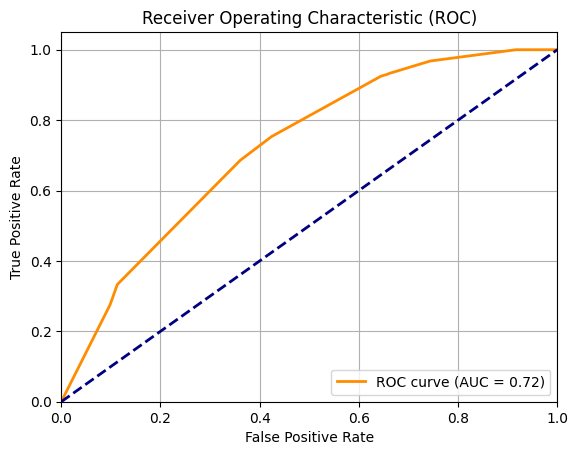

Tree depth 4
min_samples_leaf 12
goal                       0.479314
canceled                   0.243681
create_to_launch_days      0.207285
launched_at_yr             0.041241
launch_to_deadline_days    0.028479
dtype: float64
Cross-validation scores: [0.64631783 0.75920543 0.75860397 0.7527872  0.68201648 0.74212312
 0.59912748 0.72952012 0.73630635 0.71691711]
Mean accuracy: 0.7123
Standard deviation of accuracy: 0.0508


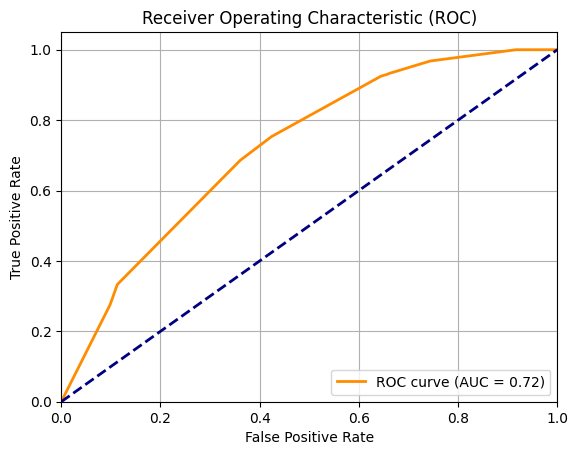

Tree depth 4
min_samples_leaf 13
goal                       0.479314
canceled                   0.243681
create_to_launch_days      0.207285
launched_at_yr             0.041241
launch_to_deadline_days    0.028479
dtype: float64
Cross-validation scores: [0.64631783 0.75920543 0.75860397 0.7527872  0.68201648 0.74212312
 0.59912748 0.72952012 0.73630635 0.71691711]
Mean accuracy: 0.7123
Standard deviation of accuracy: 0.0508


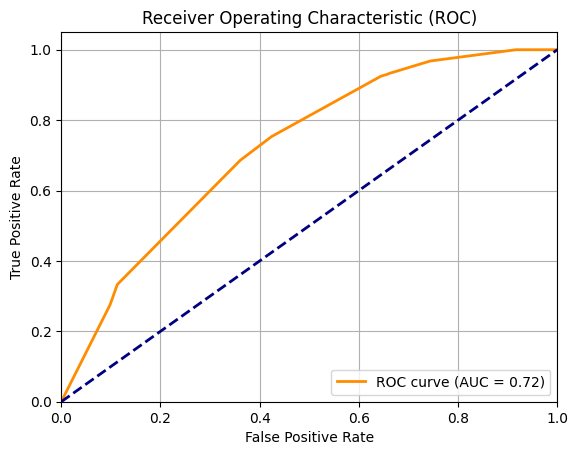

Tree depth 4
min_samples_leaf 14
goal                       0.479314
canceled                   0.243681
create_to_launch_days      0.207285
launched_at_yr             0.041241
launch_to_deadline_days    0.028479
dtype: float64
Cross-validation scores: [0.64631783 0.75920543 0.75860397 0.7527872  0.68201648 0.74212312
 0.59912748 0.72952012 0.73630635 0.71691711]
Mean accuracy: 0.7123
Standard deviation of accuracy: 0.0508


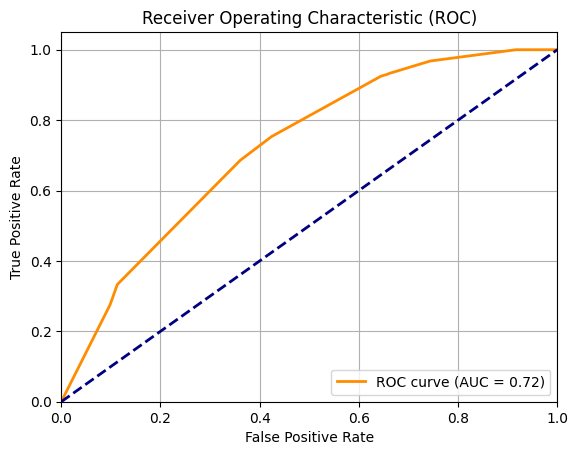

Tree depth 4
min_samples_leaf 2
goal                       0.429846
canceled                   0.215810
create_to_launch_days      0.197333
name_len_clean             0.051160
launched_at_yr             0.036524
launch_to_deadline_days    0.035002
launched_at_hr             0.022105
disable_communication      0.012220
dtype: float64
Cross-validation scores: [0.67005814 0.76162791 0.76005817 0.77217644 0.65632574 0.71158507
 0.60058168 0.71546292 0.73630635 0.71885603]
Mean accuracy: 0.7103
Standard deviation of accuracy: 0.0513


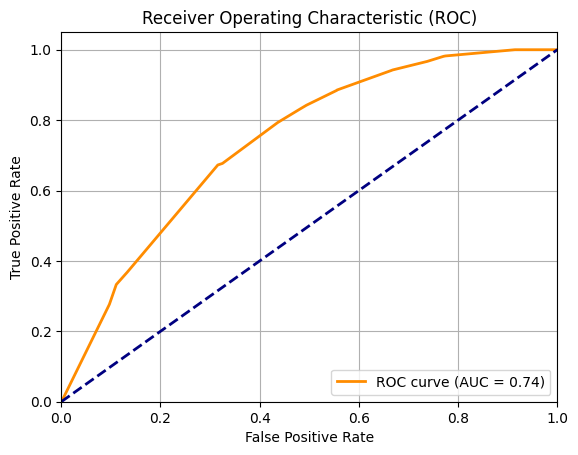

Tree depth 4
min_samples_leaf 3
goal                       0.429846
canceled                   0.215810
create_to_launch_days      0.197333
name_len_clean             0.051160
launched_at_yr             0.036524
launch_to_deadline_days    0.035002
launched_at_hr             0.022105
disable_communication      0.012220
dtype: float64
Cross-validation scores: [0.67005814 0.76162791 0.76005817 0.77217644 0.65632574 0.71158507
 0.60058168 0.71546292 0.73630635 0.71885603]
Mean accuracy: 0.7103
Standard deviation of accuracy: 0.0513


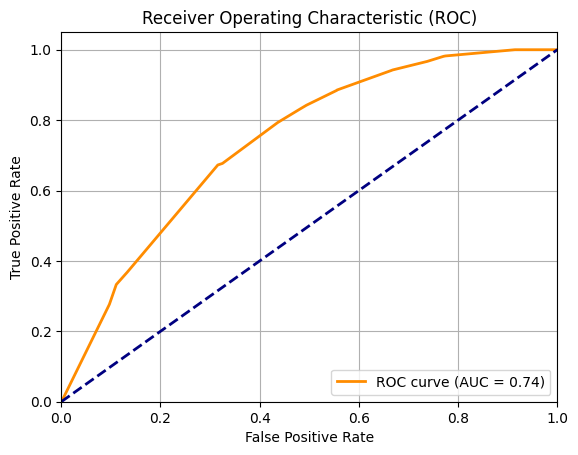

Tree depth 4
min_samples_leaf 4
goal                       0.429846
canceled                   0.215810
create_to_launch_days      0.197333
name_len_clean             0.051160
launched_at_yr             0.036524
launch_to_deadline_days    0.035002
launched_at_hr             0.022105
disable_communication      0.012220
dtype: float64
Cross-validation scores: [0.67005814 0.76162791 0.76102763 0.77217644 0.65632574 0.7120698
 0.60058168 0.71546292 0.73630635 0.71885603]
Mean accuracy: 0.7104
Standard deviation of accuracy: 0.0514


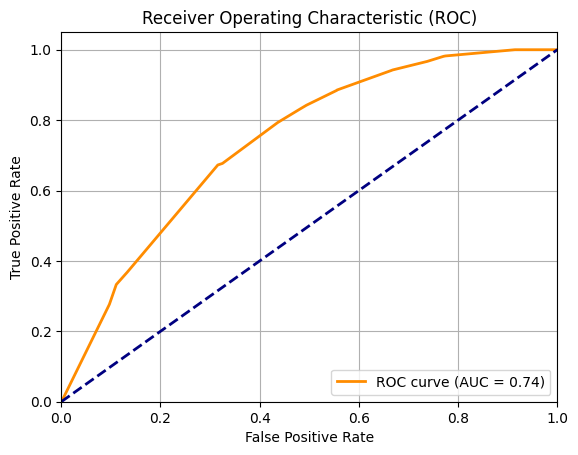

Tree depth 4
min_samples_leaf 5
goal                       0.429846
canceled                   0.215810
create_to_launch_days      0.197333
name_len_clean             0.051160
launched_at_yr             0.036524
launch_to_deadline_days    0.035002
launched_at_hr             0.022105
disable_communication      0.012220
dtype: float64
Cross-validation scores: [0.67054264 0.76162791 0.76102763 0.77217644 0.65632574 0.7120698
 0.60058168 0.71546292 0.73630635 0.71885603]
Mean accuracy: 0.7105
Standard deviation of accuracy: 0.0513


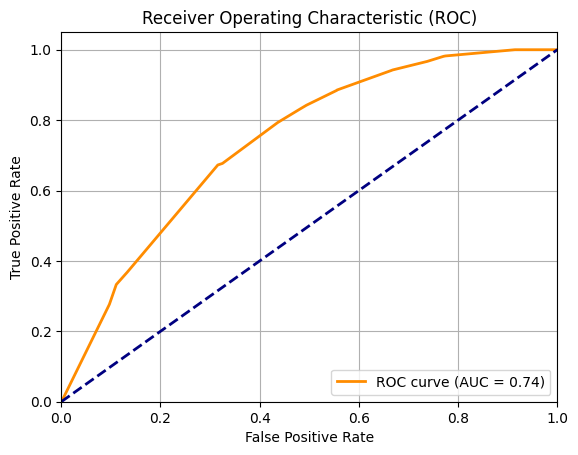

Tree depth 4
min_samples_leaf 6
goal                       0.430300
canceled                   0.216039
create_to_launch_days      0.197541
name_len_clean             0.051215
launched_at_yr             0.036562
launch_to_deadline_days    0.033982
launched_at_hr             0.022128
disable_communication      0.012233
dtype: float64
Cross-validation scores: [0.67005814 0.76162791 0.76102763 0.77217644 0.65632574 0.7120698
 0.60058168 0.71546292 0.73630635 0.71885603]
Mean accuracy: 0.7104
Standard deviation of accuracy: 0.0514


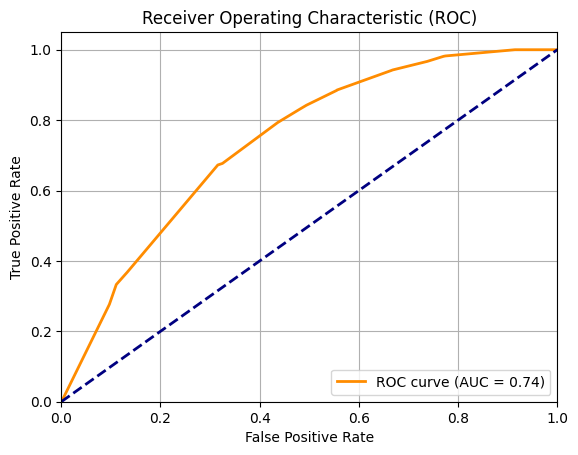

Tree depth 4
min_samples_leaf 7
goal                       0.430822
canceled                   0.216301
create_to_launch_days      0.197781
name_len_clean             0.051277
launched_at_yr             0.036607
launch_to_deadline_days    0.030760
launched_at_hr             0.022155
disable_communication      0.012248
deadline_day               0.002051
dtype: float64
Cross-validation scores: [0.67005814 0.76162791 0.7605429  0.77217644 0.65632574 0.7120698
 0.60058168 0.71546292 0.73630635 0.71885603]
Mean accuracy: 0.7104
Standard deviation of accuracy: 0.0513


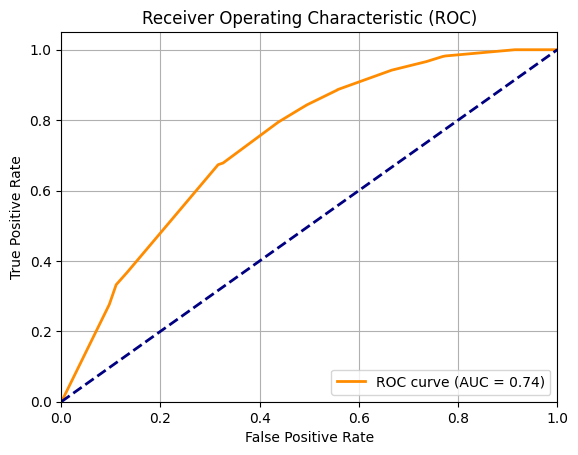

Tree depth 4
min_samples_leaf 8
goal                       0.430822
canceled                   0.216301
create_to_launch_days      0.197781
name_len_clean             0.051277
launched_at_yr             0.036607
launch_to_deadline_days    0.030760
launched_at_hr             0.022155
disable_communication      0.012248
deadline_day               0.002051
dtype: float64
Cross-validation scores: [0.67005814 0.76162791 0.7605429  0.77217644 0.65632574 0.7120698
 0.60058168 0.71546292 0.73630635 0.71885603]
Mean accuracy: 0.7104
Standard deviation of accuracy: 0.0513


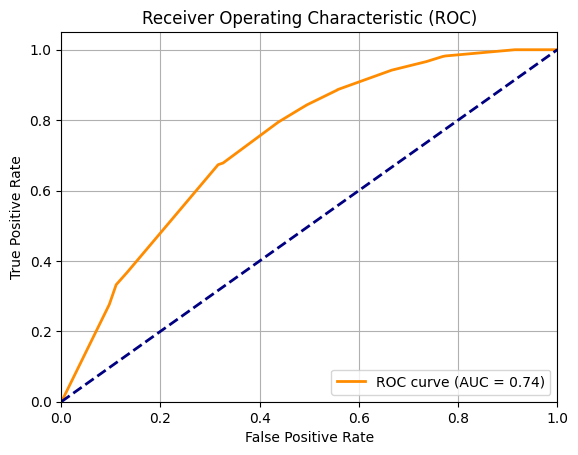

Tree depth 4
min_samples_leaf 9
goal                       0.430822
canceled                   0.216301
create_to_launch_days      0.197781
name_len_clean             0.051277
launched_at_yr             0.036607
launch_to_deadline_days    0.030760
launched_at_hr             0.022155
disable_communication      0.012248
deadline_day               0.002051
dtype: float64
Cross-validation scores: [0.67005814 0.76162791 0.7605429  0.77217644 0.65632574 0.7120698
 0.60058168 0.71546292 0.73630635 0.71885603]
Mean accuracy: 0.7104
Standard deviation of accuracy: 0.0513


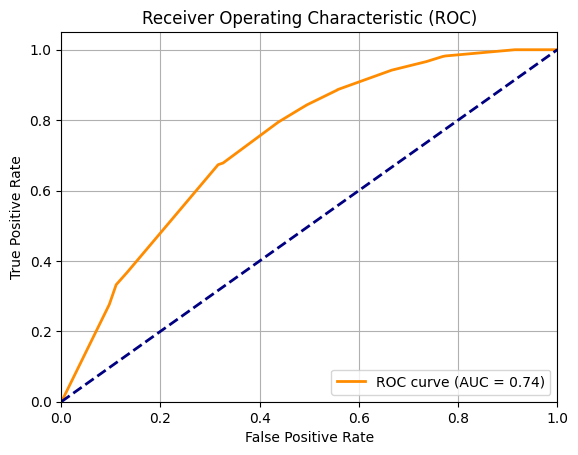

Tree depth 4
min_samples_leaf 10
goal                       0.430766
canceled                   0.216322
create_to_launch_days      0.197800
name_len_clean             0.051282
launched_at_yr             0.036610
launch_to_deadline_days    0.030763
launched_at_hr             0.022157
disable_communication      0.012249
deadline_day               0.002051
dtype: float64
Cross-validation scores: [0.67054264 0.76162791 0.7605429  0.77217644 0.65632574 0.71255453
 0.60058168 0.71546292 0.73630635 0.71885603]
Mean accuracy: 0.7105
Standard deviation of accuracy: 0.0513


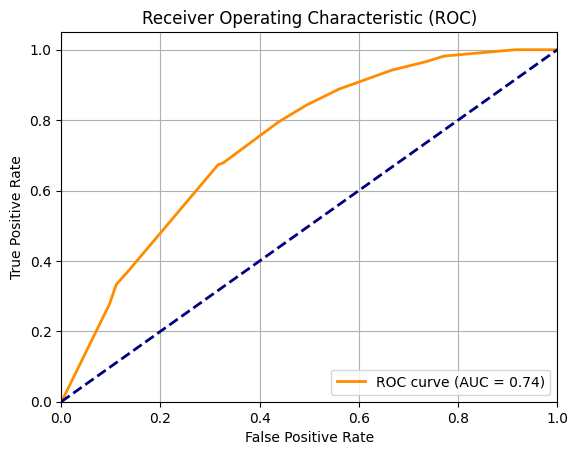

Tree depth 4
min_samples_leaf 11
goal                       0.430766
canceled                   0.216322
create_to_launch_days      0.197800
name_len_clean             0.051282
launched_at_yr             0.036610
launch_to_deadline_days    0.030763
launched_at_hr             0.022157
disable_communication      0.012249
deadline_day               0.002051
dtype: float64
Cross-validation scores: [0.6749031  0.76162791 0.7605429  0.77217644 0.65632574 0.71255453
 0.60058168 0.71546292 0.73630635 0.71885603]
Mean accuracy: 0.7109
Standard deviation of accuracy: 0.0510


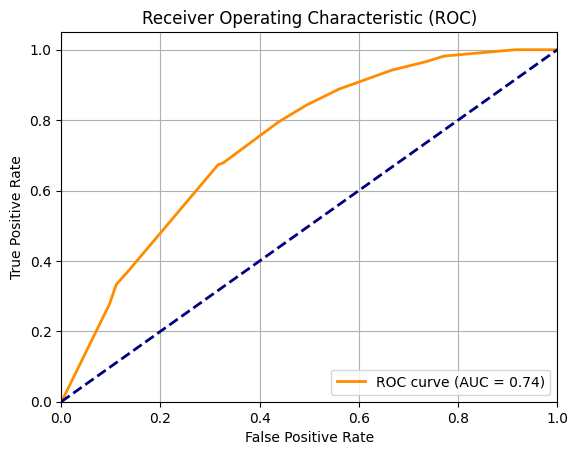

Tree depth 4
min_samples_leaf 12
goal                       0.430766
canceled                   0.216322
create_to_launch_days      0.197800
name_len_clean             0.051282
launched_at_yr             0.036610
launch_to_deadline_days    0.030763
launched_at_hr             0.022157
disable_communication      0.012249
deadline_day               0.002051
dtype: float64
Cross-validation scores: [0.6749031  0.76162791 0.7605429  0.77217644 0.65632574 0.71255453
 0.60058168 0.71546292 0.73630635 0.71885603]
Mean accuracy: 0.7109
Standard deviation of accuracy: 0.0510


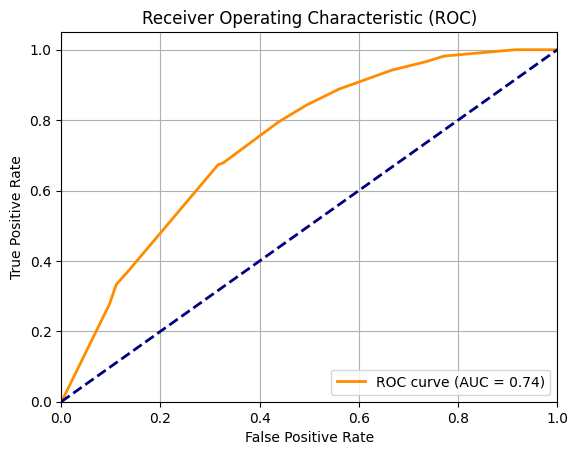

Tree depth 4
min_samples_leaf 13
goal                       0.429389
canceled                   0.216845
create_to_launch_days      0.198279
name_len_clean             0.051406
launched_at_yr             0.036699
launch_to_deadline_days    0.030837
launched_at_hr             0.022211
disable_communication      0.012279
deadline_day               0.002056
dtype: float64
Cross-validation scores: [0.6749031  0.76162791 0.7605429  0.77217644 0.65632574 0.71255453
 0.60058168 0.71546292 0.73630635 0.71885603]
Mean accuracy: 0.7109
Standard deviation of accuracy: 0.0510


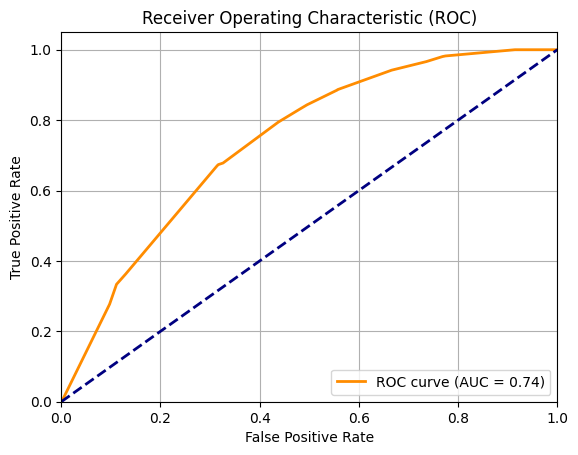

Tree depth 4
min_samples_leaf 14
goal                       0.429389
canceled                   0.216845
create_to_launch_days      0.198279
name_len_clean             0.051406
launched_at_yr             0.036699
launch_to_deadline_days    0.030837
launched_at_hr             0.022211
disable_communication      0.012279
deadline_day               0.002056
dtype: float64
Cross-validation scores: [0.6749031  0.76162791 0.7605429  0.77217644 0.65632574 0.71255453
 0.60058168 0.71546292 0.73630635 0.71885603]
Mean accuracy: 0.7109
Standard deviation of accuracy: 0.0510


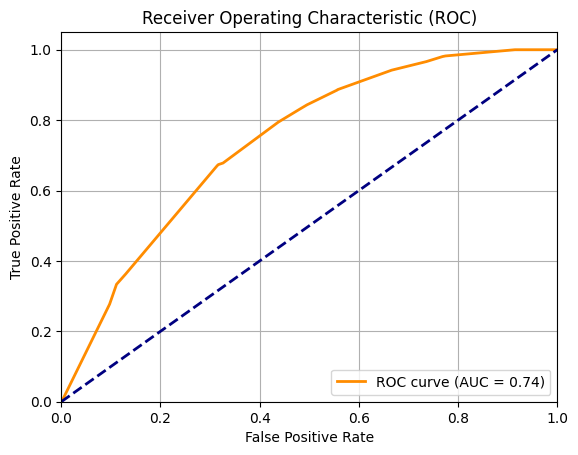

Tree depth 4
min_samples_leaf 2
goal                       0.394461
canceled                   0.195282
create_to_launch_days      0.181549
name_len_clean             0.071619
launched_at_yr             0.064430
launch_to_deadline_days    0.037602
launched_at_hr             0.022650
disable_communication      0.011058
static_usd_rate            0.007464
app                        0.004703
created_at_hr              0.002983
deadline_day               0.002876
deadline_hr                0.002771
blurb_len_clean            0.000552
dtype: float64
Cross-validation scores: [0.65649225 0.76114341 0.76102763 0.77266117 0.65874939 0.72903539
 0.60688318 0.72079496 0.72467281 0.72031023]
Mean accuracy: 0.7112
Standard deviation of accuracy: 0.0510


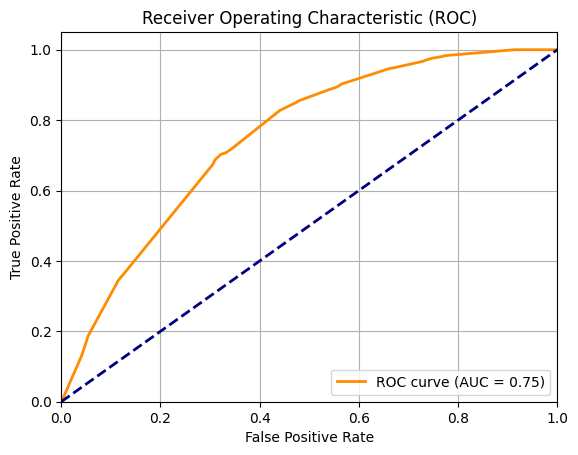

Tree depth 4
min_samples_leaf 3
goal                       0.395848
canceled                   0.195968
create_to_launch_days      0.182188
name_len_clean             0.071871
launched_at_yr             0.064656
launch_to_deadline_days    0.037734
launched_at_hr             0.022730
disable_communication      0.011097
static_usd_rate            0.007490
app                        0.004720
deadline_hr                0.003836
deadline_day               0.001862
dtype: float64
Cross-validation scores: [0.65697674 0.76114341 0.76102763 0.77266117 0.66117305 0.72952012
 0.60688318 0.72079496 0.72467281 0.72031023]
Mean accuracy: 0.7115
Standard deviation of accuracy: 0.0508


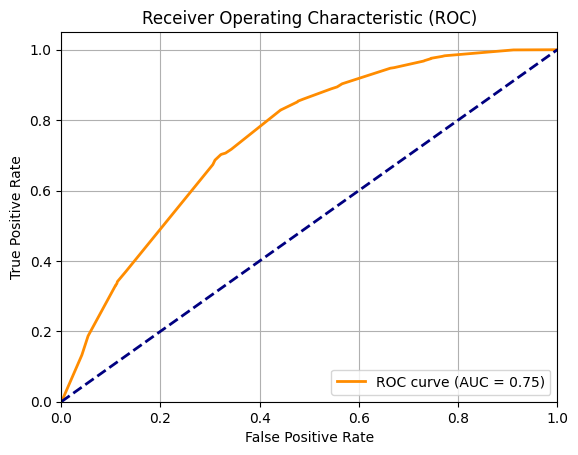

Tree depth 4
min_samples_leaf 4
goal                       0.395848
canceled                   0.195968
create_to_launch_days      0.182188
name_len_clean             0.071871
launched_at_yr             0.064656
launch_to_deadline_days    0.037734
launched_at_hr             0.022730
disable_communication      0.011097
static_usd_rate            0.007490
app                        0.004720
deadline_hr                0.003836
deadline_day               0.001862
dtype: float64
Cross-validation scores: [0.65697674 0.76114341 0.76199709 0.77266117 0.66117305 0.73048958
 0.60930683 0.72079496 0.72467281 0.72031023]
Mean accuracy: 0.7120
Standard deviation of accuracy: 0.0504


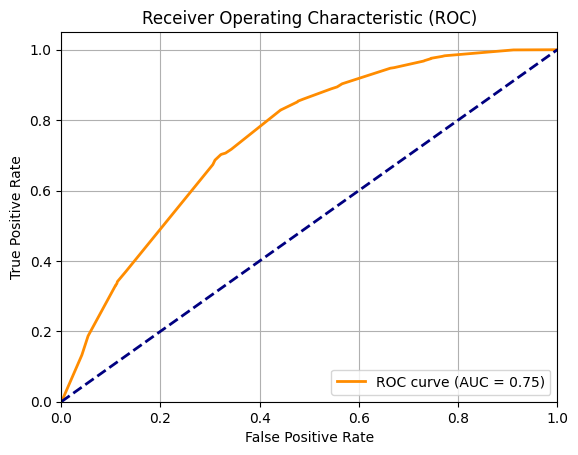

Tree depth 4
min_samples_leaf 5
goal                       0.395900
canceled                   0.195994
create_to_launch_days      0.182212
name_len_clean             0.071881
launched_at_yr             0.064665
launch_to_deadline_days    0.037739
launched_at_hr             0.022733
disable_communication      0.011098
static_usd_rate            0.007491
app                        0.004720
deadline_hr                0.003705
deadline_day               0.001863
dtype: float64
Cross-validation scores: [0.65746124 0.76114341 0.76199709 0.77266117 0.66117305 0.73000485
 0.60930683 0.72079496 0.72467281 0.72031023]
Mean accuracy: 0.7120
Standard deviation of accuracy: 0.0503


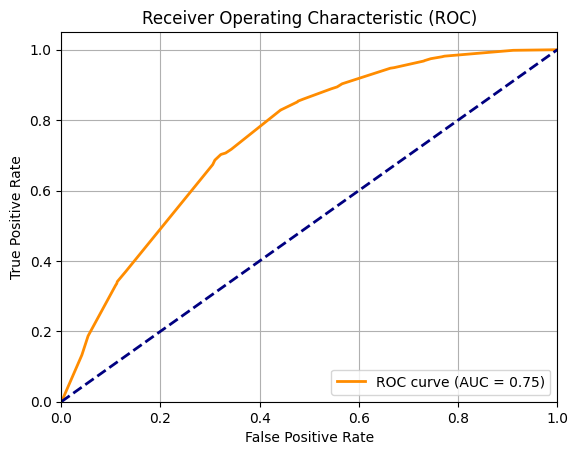

Tree depth 4
min_samples_leaf 6
goal                       0.396291
canceled                   0.196187
create_to_launch_days      0.182391
name_len_clean             0.071951
launched_at_yr             0.064729
launch_to_deadline_days    0.036816
launched_at_hr             0.022755
disable_communication      0.011109
static_usd_rate            0.007499
app                        0.004725
deadline_hr                0.003708
deadline_day               0.001838
dtype: float64
Cross-validation scores: [0.65649225 0.76114341 0.76199709 0.77266117 0.66117305 0.73000485
 0.61076103 0.72079496 0.72467281 0.71885603]
Mean accuracy: 0.7119
Standard deviation of accuracy: 0.0501


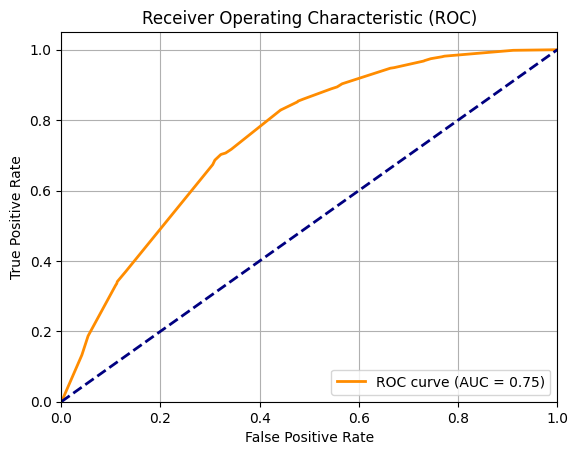

Tree depth 4
min_samples_leaf 7
goal                       0.394824
canceled                   0.195462
create_to_launch_days      0.181716
name_len_clean             0.071685
launched_at_yr             0.064489
launch_to_deadline_days    0.034553
launched_at_hr             0.022671
disable_communication      0.011068
static_usd_rate            0.007471
deadline_month             0.005805
app                        0.004707
deadline_hr                0.003695
deadline_day               0.001853
dtype: float64
Cross-validation scores: [0.65649225 0.76114341 0.76151236 0.77266117 0.6635967  0.73000485
 0.61076103 0.72079496 0.72467281 0.71885603]
Mean accuracy: 0.7120
Standard deviation of accuracy: 0.0498


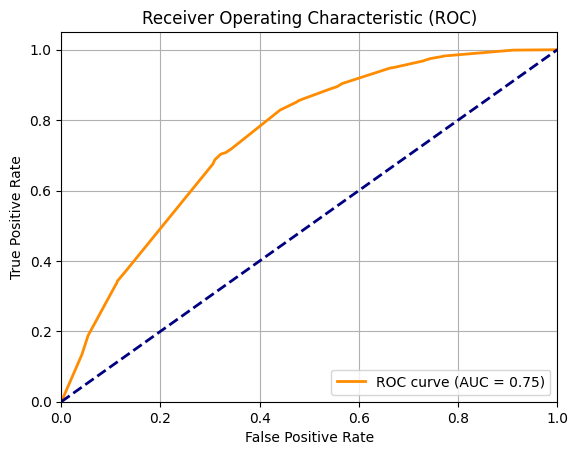

Tree depth 4
min_samples_leaf 8
goal                       0.394876
canceled                   0.195487
create_to_launch_days      0.181740
name_len_clean             0.071695
launched_at_yr             0.064498
launch_to_deadline_days    0.034426
launched_at_hr             0.022674
disable_communication      0.011069
static_usd_rate            0.007472
deadline_month             0.005806
app                        0.004708
deadline_hr                0.003695
deadline_day               0.001853
dtype: float64
Cross-validation scores: [0.65649225 0.76114341 0.76199709 0.77266117 0.6635967  0.73000485
 0.6102763  0.72079496 0.72467281 0.71885603]
Mean accuracy: 0.7120
Standard deviation of accuracy: 0.0500


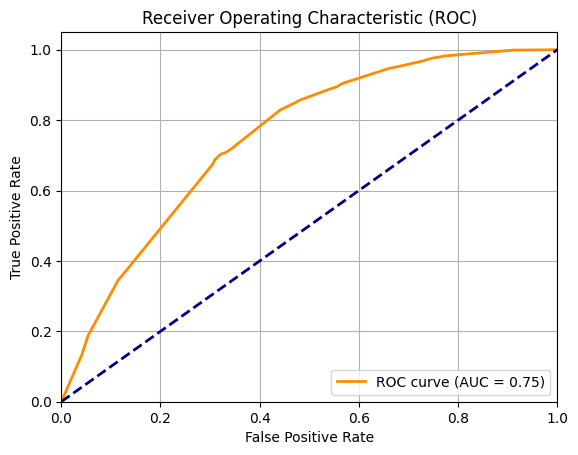

Tree depth 4
min_samples_leaf 9
goal                       0.395370
canceled                   0.195731
create_to_launch_days      0.180821
name_len_clean             0.071784
launched_at_yr             0.064578
launch_to_deadline_days    0.034367
launched_at_hr             0.022702
disable_communication      0.011083
static_usd_rate            0.007481
deadline_month             0.005813
app                        0.004714
deadline_hr                0.003700
deadline_day               0.001856
dtype: float64
Cross-validation scores: [0.65649225 0.76114341 0.76199709 0.77266117 0.66117305 0.73000485
 0.61076103 0.72079496 0.72467281 0.71885603]
Mean accuracy: 0.7119
Standard deviation of accuracy: 0.0501


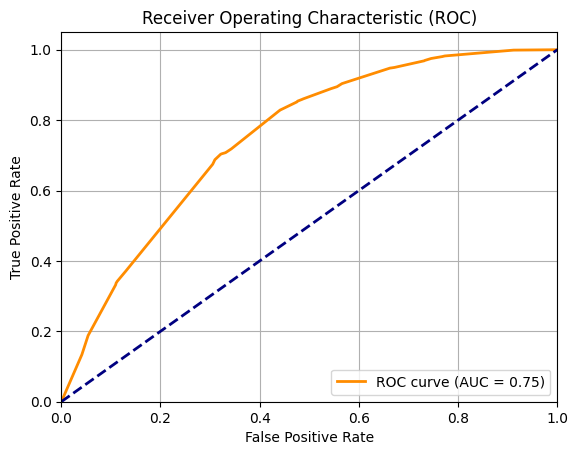

Tree depth 4
min_samples_leaf 10
goal                       0.395817
canceled                   0.195997
create_to_launch_days      0.179216
name_len_clean             0.071882
launched_at_yr             0.064666
launch_to_deadline_days    0.034331
launched_at_hr             0.022733
disable_communication      0.011098
static_usd_rate            0.007491
deadline_month             0.005821
app                        0.004720
deadline_hr                0.002781
deadline_day               0.001858
launched_at_month          0.001588
dtype: float64
Cross-validation scores: [0.65697674 0.76114341 0.76199709 0.77266117 0.66117305 0.73097431
 0.61076103 0.72079496 0.72467281 0.71885603]
Mean accuracy: 0.7120
Standard deviation of accuracy: 0.0501


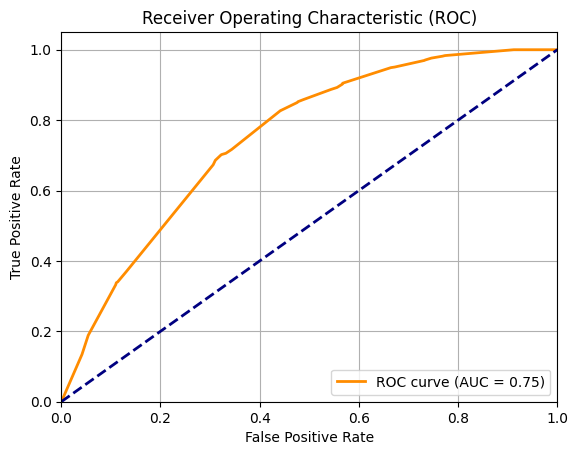

Tree depth 4
min_samples_leaf 11
goal                       0.395843
canceled                   0.196010
create_to_launch_days      0.179228
name_len_clean             0.071887
launched_at_yr             0.064670
launch_to_deadline_days    0.033826
launched_at_hr             0.022735
disable_communication      0.011099
static_usd_rate            0.007492
deadline_month             0.005821
app                        0.004721
deadline_hr                0.002781
deadline_day               0.001858
launched_at_month          0.001588
created_at_hr              0.000441
dtype: float64
Cross-validation scores: [0.65213178 0.76114341 0.76199709 0.77266117 0.6635967  0.73000485
 0.61076103 0.72079496 0.72467281 0.71885603]
Mean accuracy: 0.7117
Standard deviation of accuracy: 0.0504


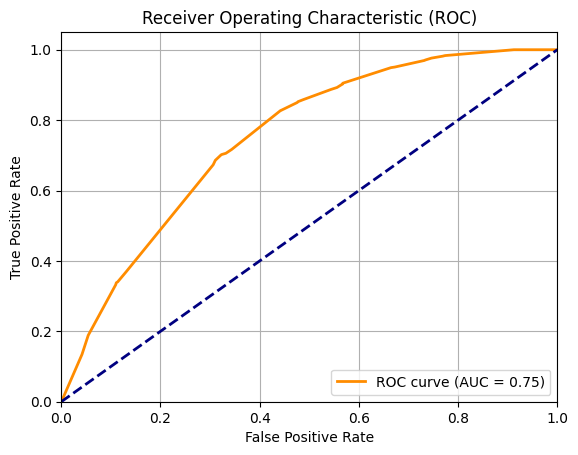

Tree depth 4
min_samples_leaf 12
goal                       0.397691
canceled                   0.196925
create_to_launch_days      0.180064
name_len_clean             0.072222
launched_at_yr             0.064972
launch_to_deadline_days    0.033984
launched_at_hr             0.022841
disable_communication      0.011151
static_usd_rate            0.007527
app                        0.004743
deadline_hr                0.002794
deadline_day               0.001867
launched_at_month          0.001595
created_at_month           0.001237
created_at_hr              0.000387
dtype: float64
Cross-validation scores: [0.65213178 0.76114341 0.76199709 0.77266117 0.66553563 0.73000485
 0.61173049 0.72079496 0.72467281 0.71885603]
Mean accuracy: 0.7120
Standard deviation of accuracy: 0.0500


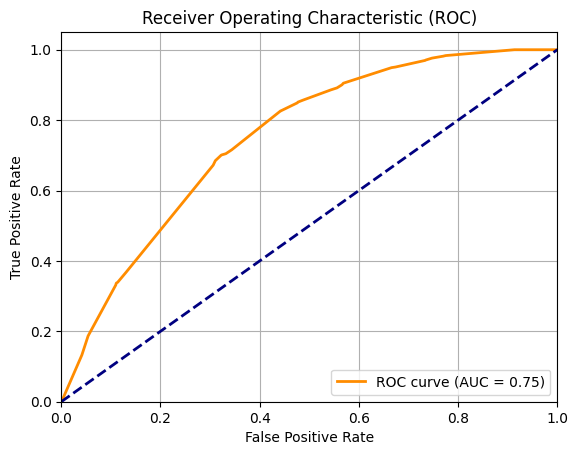

Tree depth 4
min_samples_leaf 13
goal                       0.395832
canceled                   0.197468
create_to_launch_days      0.180901
name_len_clean             0.072421
launched_at_yr             0.065151
launch_to_deadline_days    0.034077
launched_at_hr             0.022904
disable_communication      0.011182
static_usd_rate            0.007548
app                        0.004756
deadline_hr                0.002802
created_at_day             0.002375
deadline_day               0.001872
created_at_month           0.000711
dtype: float64
Cross-validation scores: [0.65213178 0.76114341 0.76199709 0.77266117 0.66553563 0.73000485
 0.61173049 0.72079496 0.72467281 0.71885603]
Mean accuracy: 0.7120
Standard deviation of accuracy: 0.0500


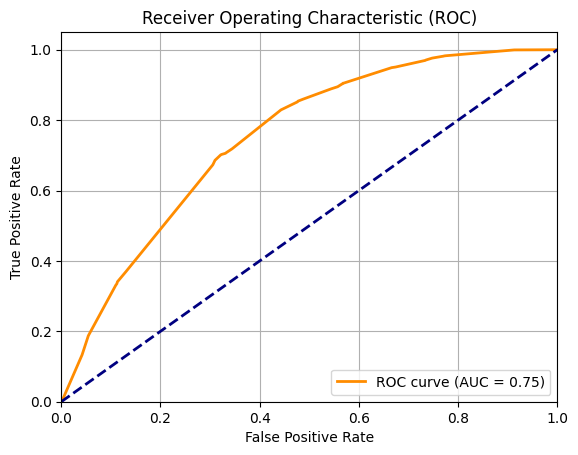

Tree depth 4
min_samples_leaf 14
goal                       0.395848
canceled                   0.197476
create_to_launch_days      0.180867
name_len_clean             0.072424
launched_at_yr             0.065154
launch_to_deadline_days    0.034079
launched_at_hr             0.022905
disable_communication      0.011182
static_usd_rate            0.007548
app                        0.004756
deadline_hr                0.002802
created_at_day             0.002376
deadline_day               0.001872
created_at_month           0.000712
dtype: float64
Cross-validation scores: [0.65213178 0.76114341 0.76199709 0.77266117 0.66117305 0.73000485
 0.61076103 0.72079496 0.72467281 0.71885603]
Mean accuracy: 0.7114
Standard deviation of accuracy: 0.0506


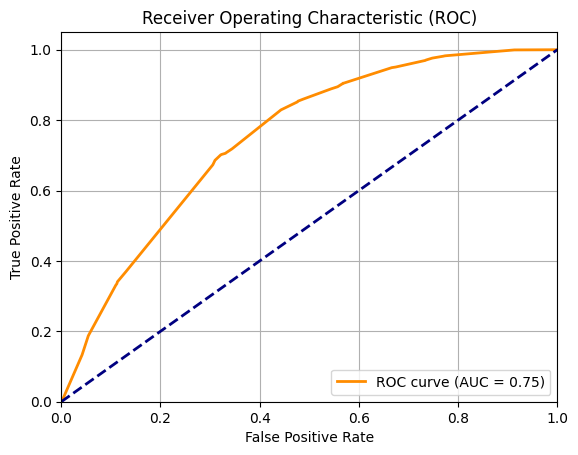

Tree depth 4
min_samples_leaf 2
goal                       0.365732
create_to_launch_days      0.177444
canceled                   0.175010
name_len_clean             0.067679
launched_at_yr             0.061828
launch_to_deadline_days    0.053355
launched_at_hr             0.037330
deadline_hr                0.014374
disable_communication      0.009910
static_usd_rate            0.006689
deadline_day               0.006235
deadline_month             0.005756
launched_at_day            0.005473
app                        0.004215
created_at_day             0.003999
created_at_hr              0.002673
blurb_len_clean            0.002297
dtype: float64
Cross-validation scores: [0.66327519 0.76744186 0.76005817 0.78138633 0.64129908 0.72903539
 0.6102763  0.72127969 0.73727581 0.71449346]
Mean accuracy: 0.7126
Standard deviation of accuracy: 0.0538


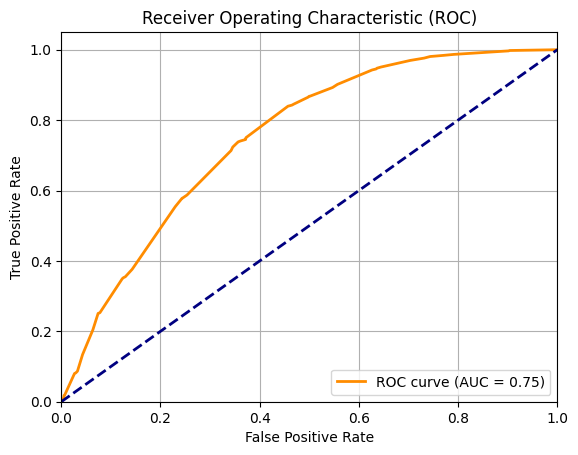

Tree depth 4
min_samples_leaf 3
goal                       0.366937
canceled                   0.175586
create_to_launch_days      0.174243
name_len_clean             0.067902
launched_at_yr             0.062032
launch_to_deadline_days    0.053530
launched_at_hr             0.037453
deadline_hr                0.014643
disable_communication      0.009943
deadline_month             0.009557
static_usd_rate            0.006711
app                        0.006364
launched_at_day            0.005477
created_at_day             0.004013
blurb_len_clean            0.003494
deadline_day               0.001669
launched_at_month          0.000448
dtype: float64
Cross-validation scores: [0.66375969 0.76695736 0.7605429  0.78187106 0.64275327 0.72903539
 0.61076103 0.72127969 0.73727581 0.71449346]
Mean accuracy: 0.7129
Standard deviation of accuracy: 0.0535


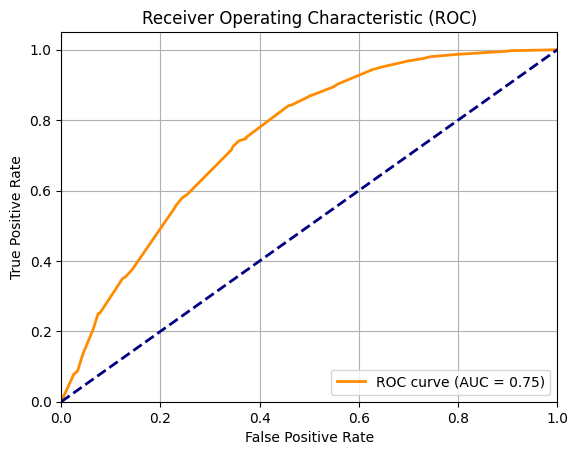

Tree depth 4
min_samples_leaf 4
goal                       0.367127
canceled                   0.177040
create_to_launch_days      0.172728
name_len_clean             0.067937
launched_at_yr             0.062064
launch_to_deadline_days    0.053558
launched_at_hr             0.037472
deadline_hr                0.014651
disable_communication      0.009948
deadline_month             0.009562
static_usd_rate            0.006715
app                        0.006367
launched_at_day            0.005341
created_at_day             0.004015
blurb_len_clean            0.003495
deadline_day               0.001669
created_at_month           0.000310
dtype: float64
Cross-validation scores: [0.66472868 0.76695736 0.76151236 0.78187106 0.64275327 0.73000485
 0.61124576 0.72127969 0.73776054 0.71497819]
Mean accuracy: 0.7133
Standard deviation of accuracy: 0.0535


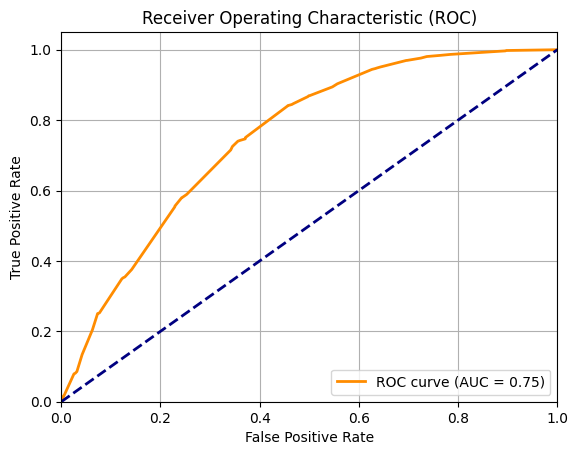

Tree depth 4
min_samples_leaf 5
goal                       0.367314
canceled                   0.177130
create_to_launch_days      0.174941
name_len_clean             0.067972
launched_at_yr             0.062095
launch_to_deadline_days    0.053585
launched_at_hr             0.037719
deadline_hr                0.014540
disable_communication      0.009953
deadline_month             0.009567
static_usd_rate            0.006718
launched_at_day            0.005048
app                        0.004233
created_at_day             0.004017
blurb_len_clean            0.003497
deadline_day               0.001670
dtype: float64
Cross-validation scores: [0.66472868 0.76744186 0.76151236 0.78235579 0.63984489 0.72952012
 0.61076103 0.72127969 0.73776054 0.71497819]
Mean accuracy: 0.7130
Standard deviation of accuracy: 0.0541


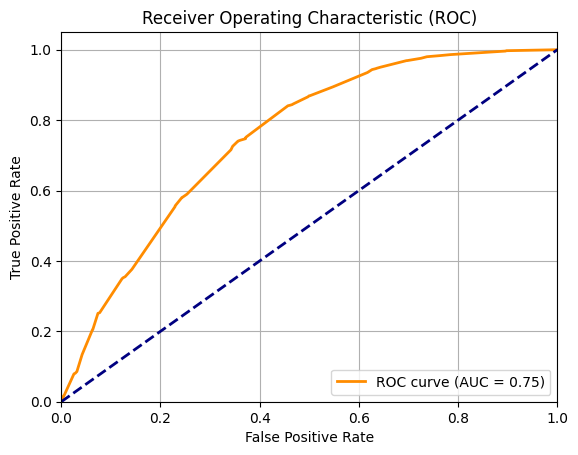

Tree depth 4
min_samples_leaf 6
goal                       0.368558
canceled                   0.177335
create_to_launch_days      0.175144
name_len_clean             0.068051
launched_at_yr             0.062167
launch_to_deadline_days    0.052787
launched_at_hr             0.037535
deadline_hr                0.014557
disable_communication      0.009964
deadline_month             0.009751
static_usd_rate            0.006726
launched_at_day            0.005054
app                        0.004238
created_at_day             0.004021
blurb_len_clean            0.002463
deadline_day               0.001649
dtype: float64
Cross-validation scores: [0.66327519 0.76356589 0.76102763 0.78332525 0.643238   0.72903539
 0.61269995 0.72127969 0.73824527 0.71497819]
Mean accuracy: 0.7131
Standard deviation of accuracy: 0.0531


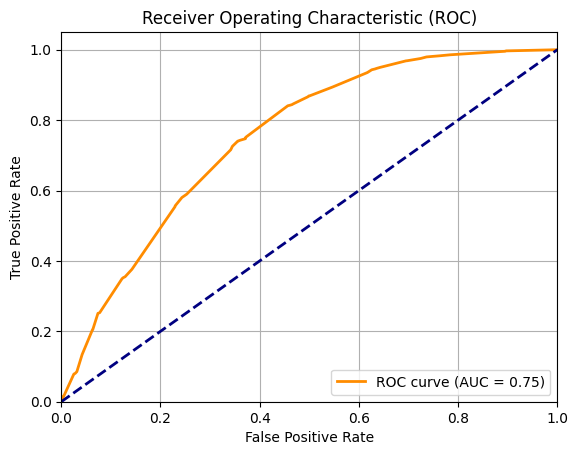

Tree depth 4
min_samples_leaf 7
goal                       0.369101
canceled                   0.177673
create_to_launch_days      0.175478
name_len_clean             0.068180
launched_at_yr             0.062286
launch_to_deadline_days    0.049723
launched_at_hr             0.037740
deadline_hr                0.014584
deadline_month             0.011035
disable_communication      0.009983
static_usd_rate            0.006739
launched_at_day            0.005064
app                        0.004246
created_at_day             0.004029
blurb_len_clean            0.002468
deadline_day               0.001671
dtype: float64
Cross-validation scores: [0.66424419 0.76356589 0.76005817 0.78284052 0.64129908 0.72903539
 0.61318468 0.72127969 0.73776054 0.71497819]
Mean accuracy: 0.7128
Standard deviation of accuracy: 0.0530


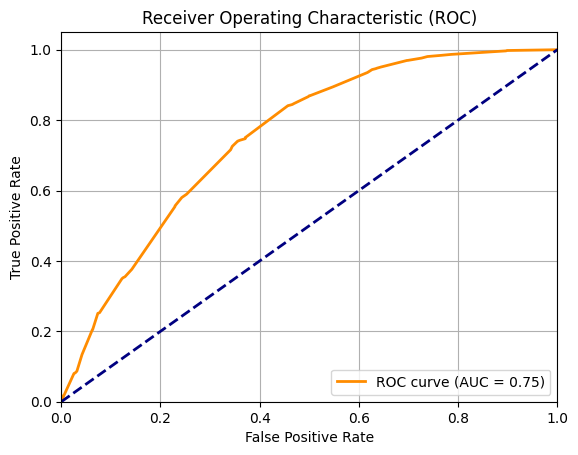

Tree depth 4
min_samples_leaf 8
goal                       0.366659
canceled                   0.178249
create_to_launch_days      0.176590
name_len_clean             0.068402
launched_at_yr             0.062488
launch_to_deadline_days    0.049765
launched_at_hr             0.037729
deadline_hr                0.014632
deadline_month             0.011071
disable_communication      0.010016
static_usd_rate            0.006761
launched_at_day            0.005080
app                        0.004260
created_at_day             0.004042
blurb_len_clean            0.002476
deadline_day               0.001677
created_at_hr              0.000104
dtype: float64
Cross-validation scores: [0.66424419 0.76356589 0.7605429  0.78284052 0.64129908 0.72903539
 0.61318468 0.72176442 0.73727581 0.71643238]
Mean accuracy: 0.7130
Standard deviation of accuracy: 0.0530


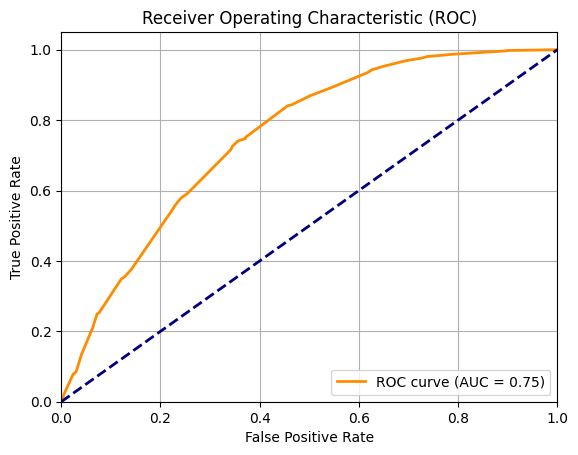

Tree depth 4
min_samples_leaf 9
goal                       0.367972
canceled                   0.178628
create_to_launch_days      0.175113
name_len_clean             0.068547
launched_at_yr             0.062621
launch_to_deadline_days    0.052347
launched_at_hr             0.034706
deadline_hr                0.014663
deadline_month             0.011546
disable_communication      0.010037
static_usd_rate            0.006775
launched_at_day            0.005091
app                        0.004269
created_at_day             0.004051
deadline_day               0.002434
blurb_len_clean            0.001200
dtype: float64
Cross-validation scores: [0.66424419 0.76501938 0.76151236 0.78284052 0.65002424 0.72952012
 0.61269995 0.72224915 0.73776054 0.71643238]
Mean accuracy: 0.7142
Standard deviation of accuracy: 0.0523


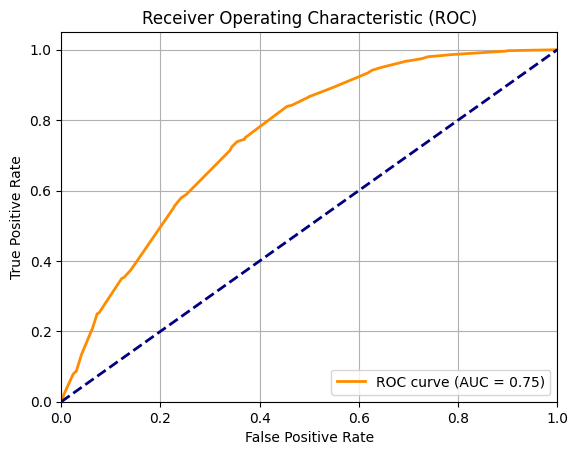

Tree depth 4
min_samples_leaf 10
goal                       0.368502
canceled                   0.179185
create_to_launch_days      0.171146
name_len_clean             0.068761
launched_at_yr             0.064128
launch_to_deadline_days    0.049859
launched_at_hr             0.037927
deadline_hr                0.013871
deadline_month             0.011129
disable_communication      0.010068
static_usd_rate            0.007713
launched_at_day            0.005107
app                        0.004282
created_at_day             0.004063
deadline_day               0.002441
launched_at_month          0.001440
created_at_month           0.000379
dtype: float64
Cross-validation scores: [0.66424419 0.76598837 0.7605429  0.78284052 0.65002424 0.7324285
 0.61269995 0.72176442 0.73776054 0.71643238]
Mean accuracy: 0.7145
Standard deviation of accuracy: 0.0524


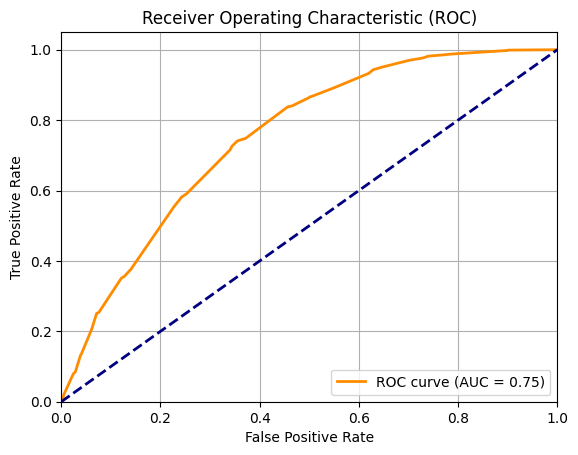

Tree depth 4
min_samples_leaf 11
goal                       0.369209
canceled                   0.179529
create_to_launch_days      0.171140
name_len_clean             0.068893
launched_at_yr             0.064251
launch_to_deadline_days    0.046678
launched_at_hr             0.037999
deadline_hr                0.013897
deadline_month             0.011469
disable_communication      0.010088
static_usd_rate            0.007496
launched_at_day            0.005117
app                        0.004290
created_at_day             0.004071
launched_at_month          0.003427
deadline_day               0.002446
dtype: float64
Cross-validation scores: [0.66521318 0.76501938 0.7605429  0.78332525 0.64420746 0.73145904
 0.61269995 0.72127969 0.73776054 0.71643238]
Mean accuracy: 0.7138
Standard deviation of accuracy: 0.0529


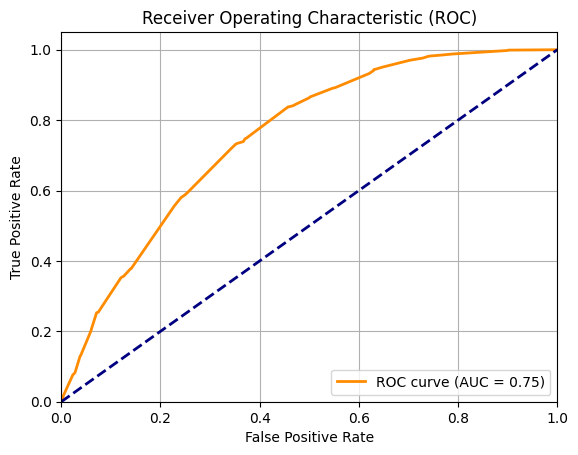

Tree depth 4
min_samples_leaf 12
goal                       0.371196
canceled                   0.180495
create_to_launch_days      0.170654
name_len_clean             0.069263
launched_at_yr             0.064597
launch_to_deadline_days    0.049611
launched_at_hr             0.035069
deadline_hr                0.013972
disable_communication      0.010142
static_usd_rate            0.006846
deadline_month             0.005891
launched_at_day            0.005144
app                        0.004314
created_at_day             0.004093
launched_at_month          0.003445
deadline_day               0.002459
blurb_len_clean            0.001331
created_at_month           0.001125
created_at_hr              0.000352
dtype: float64
Cross-validation scores: [0.66472868 0.76501938 0.76102763 0.78235579 0.64711585 0.73145904
 0.61366941 0.72079496 0.73679108 0.71594765]
Mean accuracy: 0.7139
Standard deviation of accuracy: 0.0523


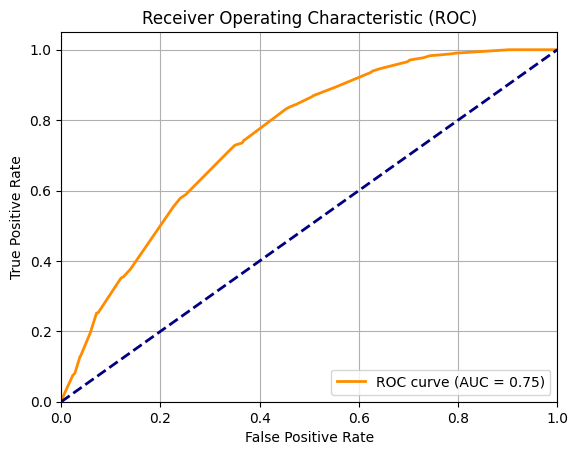

Tree depth 4
min_samples_leaf 13
goal                       0.369959
canceled                   0.181202
create_to_launch_days      0.171632
name_len_clean             0.069535
launched_at_yr             0.063523
launch_to_deadline_days    0.046579
launched_at_hr             0.038353
deadline_hr                0.014027
disable_communication      0.010182
static_usd_rate            0.006873
created_at_day             0.006272
deadline_month             0.005914
launched_at_day            0.005164
app                        0.004330
launched_at_month          0.002650
deadline_day               0.002469
blurb_len_clean            0.001336
dtype: float64
Cross-validation scores: [0.66472868 0.76550388 0.76151236 0.78187106 0.64711585 0.73291323
 0.61366941 0.72031023 0.73679108 0.71594765]
Mean accuracy: 0.7140
Standard deviation of accuracy: 0.0523


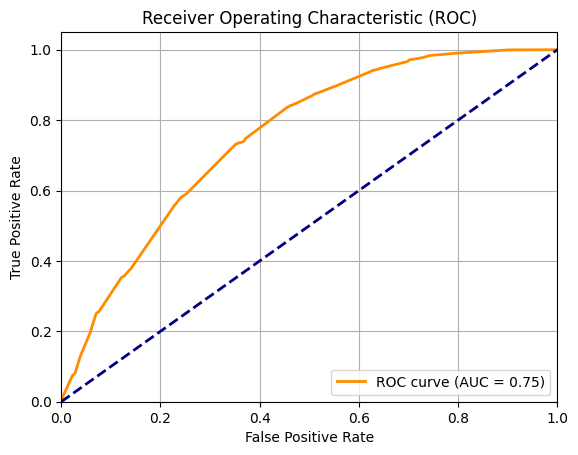

Tree depth 4
min_samples_leaf 14
goal                       0.370611
canceled                   0.181388
create_to_launch_days      0.171499
name_len_clean             0.069606
launched_at_yr             0.063588
launch_to_deadline_days    0.045638
launched_at_hr             0.038393
deadline_hr                0.014041
disable_communication      0.010192
static_usd_rate            0.006880
created_at_day             0.006278
deadline_month             0.005920
launched_at_day            0.005170
app                        0.004335
launched_at_month          0.002652
deadline_day               0.002471
blurb_len_clean            0.001338
dtype: float64
Cross-validation scores: [0.66472868 0.76598837 0.76151236 0.78138633 0.64760058 0.73291323
 0.61269995 0.72031023 0.73679108 0.71691711]
Mean accuracy: 0.7141
Standard deviation of accuracy: 0.0525


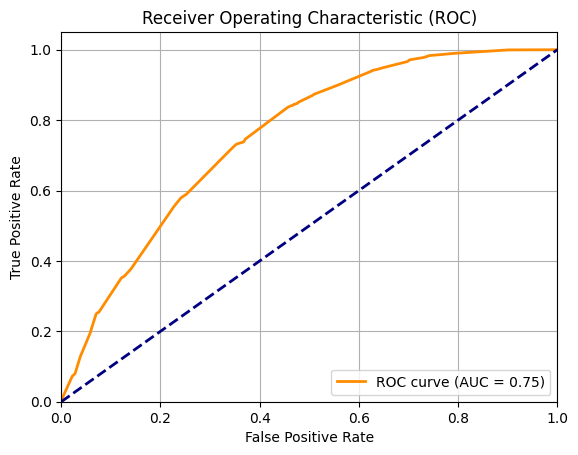

Tree depth 4
min_samples_leaf 2
goal                       0.331240
create_to_launch_days      0.160261
canceled                   0.155488
launched_at_yr             0.059725
name_len_clean             0.058948
launch_to_deadline_days    0.057590
launched_at_hr             0.033045
deadline_hr                0.024375
static_usd_rate            0.014778
deadline_month             0.013607
created_at_day             0.013325
blurb_len_clean            0.010387
launched_at_day            0.010371
LaunchedTuesday            0.009683
world                      0.009300
deadline_day               0.009071
disable_communication      0.008631
TOPCOUNTRY                 0.007880
app                        0.005603
created_at_hr              0.005163
launched_at_month          0.001077
new                        0.000454
dtype: float64
Cross-validation scores: [0.65600775 0.74321705 0.77217644 0.79011149 0.6446922  0.72661173
 0.62530296 0.72855065 0.73533689 0.72709646]
Mean accuracy: 0.7149
S

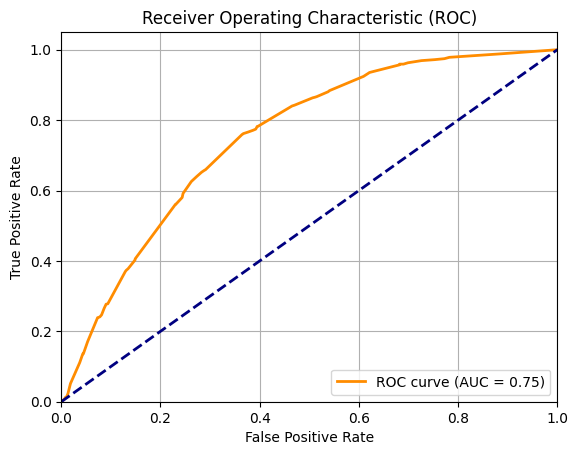

Tree depth 4
min_samples_leaf 3
goal                       0.332578
create_to_launch_days      0.159756
canceled                   0.156761
launched_at_yr             0.060212
name_len_clean             0.059429
launch_to_deadline_days    0.058060
launched_at_hr             0.033315
deadline_hr                0.023481
static_usd_rate            0.017936
deadline_month             0.014949
blurb_len_clean            0.012424
created_at_day             0.011365
LaunchedTuesday            0.009762
launched_at_day            0.009477
disable_communication      0.008702
TOPCOUNTRY                 0.007944
world                      0.007521
deadline_day               0.005662
app                        0.005569
created_at_hr              0.004246
new                        0.000458
launched_at_month          0.000392
dtype: float64
Cross-validation scores: [0.65503876 0.74127907 0.77266117 0.7886573  0.64566166 0.72806592
 0.62578769 0.72903539 0.73533689 0.72855065]
Mean accuracy: 0.7150
S

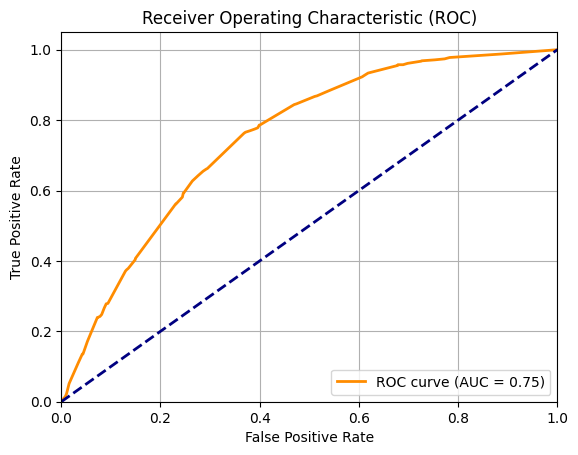

Tree depth 4
min_samples_leaf 4
goal                       0.334828
canceled                   0.157940
create_to_launch_days      0.156562
name_len_clean             0.062712
launched_at_yr             0.060641
launch_to_deadline_days    0.057158
launched_at_hr             0.036262
deadline_hr                0.023922
static_usd_rate            0.019213
deadline_month             0.014259
blurb_len_clean            0.011114
LaunchedTuesday            0.009831
launched_at_day            0.008815
disable_communication      0.008764
created_at_day             0.008405
TOPCOUNTRY                 0.008001
world                      0.007575
app                        0.005609
deadline_day               0.003854
launched_at_month          0.002715
created_at_hr              0.001359
new                        0.000461
dtype: float64
Cross-validation scores: [0.65600775 0.73934109 0.77363063 0.78962676 0.64614639 0.72855065
 0.62675715 0.72855065 0.73630635 0.72903539]
Mean accuracy: 0.7154
S

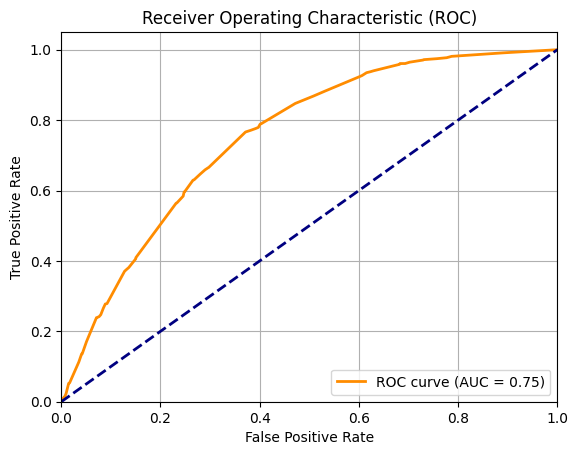

Tree depth 4
min_samples_leaf 5
goal                       0.337310
canceled                   0.159230
create_to_launch_days      0.157372
name_len_clean             0.061387
launched_at_yr             0.061137
launch_to_deadline_days    0.058952
launched_at_hr             0.033827
deadline_hr                0.025994
static_usd_rate            0.015127
created_at_day             0.011539
blurb_len_clean            0.011204
LaunchedTuesday            0.009912
disable_communication      0.008836
deadline_month             0.008493
TOPCOUNTRY                 0.008066
world                      0.007637
launched_at_day            0.007404
deadline_day               0.006529
launched_at_month          0.004452
app                        0.003758
created_at_hr              0.001371
new                        0.000465
dtype: float64
Cross-validation scores: [0.65697674 0.73885659 0.77363063 0.78817256 0.64275327 0.72515754
 0.62675715 0.72806592 0.73630635 0.72709646]
Mean accuracy: 0.7144
S

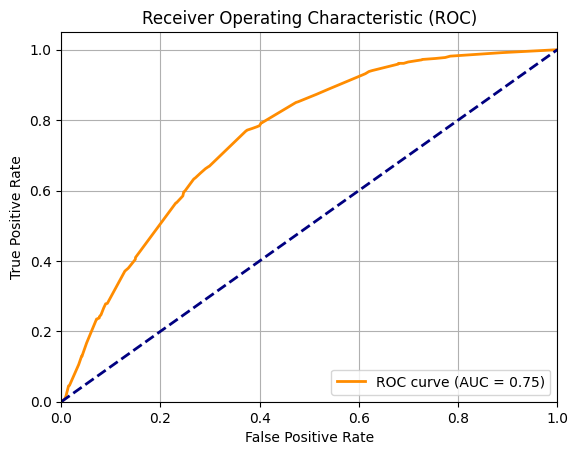

Tree depth 4
min_samples_leaf 6
goal                       0.339598
canceled                   0.157974
create_to_launch_days      0.157373
launched_at_yr             0.064834
name_len_clean             0.061671
launch_to_deadline_days    0.055714
launched_at_hr             0.036860
deadline_hr                0.025669
static_usd_rate            0.015197
blurb_len_clean            0.010331
disable_communication      0.008876
launched_at_day            0.008744
deadline_month             0.008532
created_at_day             0.008328
LaunchedTuesday            0.008149
TOPCOUNTRY                 0.008103
world                      0.007672
launched_at_month          0.005926
deadline_day               0.004675
app                        0.003929
created_at_hr              0.001377
new                        0.000467
dtype: float64
Cross-validation scores: [0.65891473 0.74079457 0.77266117 0.7886573  0.6446922  0.72564227
 0.62724188 0.72855065 0.73824527 0.726127  ]
Mean accuracy: 0.7152
S

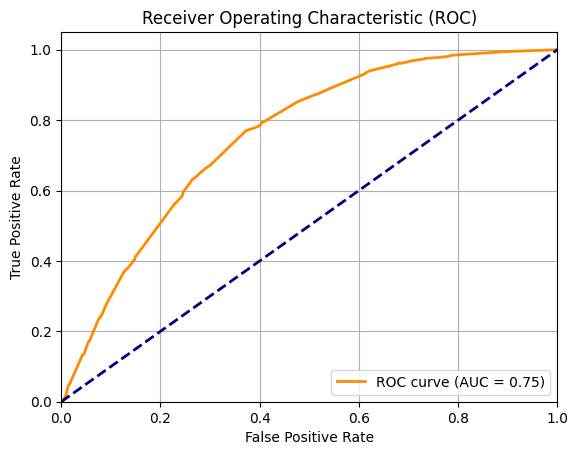

Tree depth 4
min_samples_leaf 7
goal                       0.340002
canceled                   0.158501
create_to_launch_days      0.157898
launched_at_yr             0.065051
name_len_clean             0.061877
launch_to_deadline_days    0.053077
launched_at_hr             0.036969
deadline_hr                0.023926
static_usd_rate            0.015248
blurb_len_clean            0.010474
deadline_month             0.009844
launched_at_day            0.009609
disable_communication      0.008906
created_at_day             0.008539
LaunchedTuesday            0.008177
TOPCOUNTRY                 0.008130
world                      0.007698
launched_at_month          0.005946
deadline_day               0.004490
app                        0.003788
created_at_hr              0.001382
new                        0.000468
dtype: float64
Cross-validation scores: [0.65746124 0.73885659 0.77169171 0.79011149 0.6446922  0.72467281
 0.62724188 0.72855065 0.73679108 0.72661173]
Mean accuracy: 0.7147
S

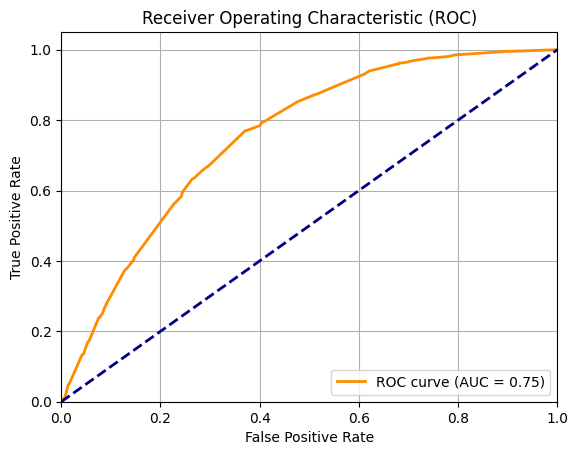

Tree depth 4
min_samples_leaf 8
goal                       0.339455
canceled                   0.159260
create_to_launch_days      0.158654
launched_at_yr             0.063676
name_len_clean             0.061114
launch_to_deadline_days    0.053224
launched_at_hr             0.037026
deadline_hr                0.024041
static_usd_rate            0.015321
launched_at_day            0.010333
blurb_len_clean            0.009933
deadline_month             0.009891
disable_communication      0.008949
created_at_day             0.008553
TOPCOUNTRY                 0.008169
world                      0.007497
LaunchedTuesday            0.006686
launched_at_month          0.005765
deadline_day               0.004605
app                        0.003806
created_at_hr              0.002129
DeadlineWeekend            0.001444
new                        0.000471
dtype: float64
Cross-validation scores: [0.65891473 0.73982558 0.77169171 0.79011149 0.643238   0.72418808
 0.62869607 0.72952012 0.73630635

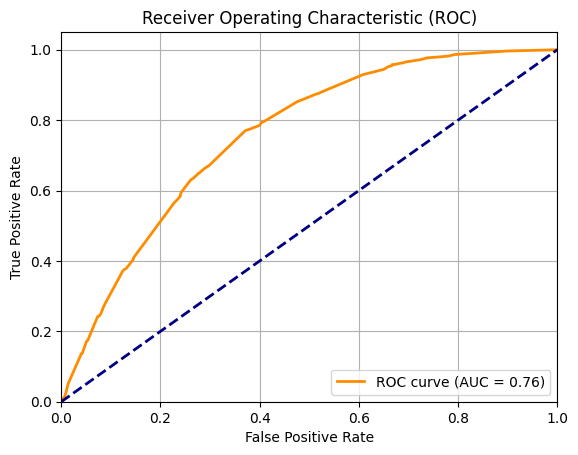

Tree depth 4
min_samples_leaf 9
goal                       0.340001
canceled                   0.159520
create_to_launch_days      0.157746
launched_at_yr             0.063780
name_len_clean             0.061215
launch_to_deadline_days    0.052752
launched_at_hr             0.039854
deadline_hr                0.025406
static_usd_rate            0.015346
deadline_month             0.011458
launched_at_day            0.009425
disable_communication      0.008963
created_at_day             0.008410
TOPCOUNTRY                 0.008183
world                      0.007325
LaunchedTuesday            0.006697
blurb_len_clean            0.006156
deadline_day               0.005191
launched_at_month          0.004710
app                        0.003812
created_at_hr              0.002132
DeadlineWeekend            0.001446
new                        0.000471
dtype: float64
Cross-validation scores: [0.65891473 0.73982558 0.77217644 0.79059622 0.64129908 0.72661173
 0.62772661 0.73000485 0.73630635

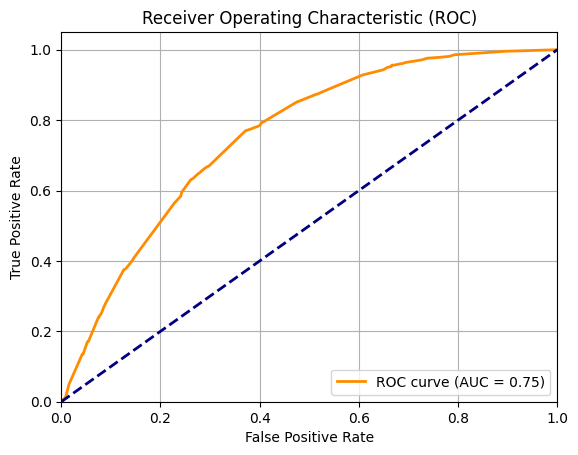

Tree depth 4
min_samples_leaf 10
goal                       0.342045
canceled                   0.160739
create_to_launch_days      0.155997
launched_at_yr             0.065445
name_len_clean             0.061682
launch_to_deadline_days    0.056360
launched_at_hr             0.036189
deadline_hr                0.023512
static_usd_rate            0.016286
deadline_month             0.009983
created_at_day             0.009387
launched_at_day            0.009360
disable_communication      0.009032
TOPCOUNTRY                 0.008245
world                      0.007232
LaunchedTuesday            0.006749
launched_at_month          0.005793
deadline_day               0.005148
blurb_len_clean            0.005123
app                        0.003841
created_at_hr              0.001038
new                        0.000475
created_at_month           0.000340
dtype: float64
Cross-validation scores: [0.65600775 0.73934109 0.77169171 0.79108095 0.64178381 0.73000485
 0.62772661 0.72855065 0.7363063

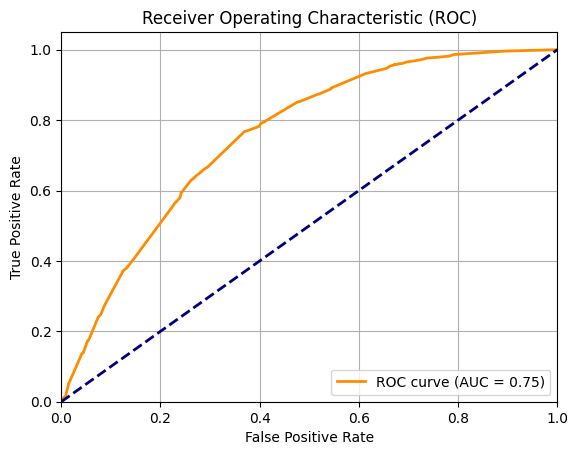

Tree depth 4
min_samples_leaf 11
goal                       0.344692
canceled                   0.161112
create_to_launch_days      0.157228
launched_at_yr             0.065597
name_len_clean             0.061825
launch_to_deadline_days    0.053192
launched_at_hr             0.036273
deadline_hr                0.024270
static_usd_rate            0.016116
deadline_month             0.010006
created_at_day             0.009395
launched_at_day            0.009381
disable_communication      0.009053
TOPCOUNTRY                 0.008264
LaunchedTuesday            0.008172
launched_at_month          0.007566
world                      0.005294
deadline_day               0.005160
app                        0.003850
blurb_len_clean            0.001678
created_at_hr              0.001400
new                        0.000476
dtype: float64
Cross-validation scores: [0.66957364 0.7374031  0.77169171 0.79253514 0.64372273 0.72903539
 0.62821134 0.72855065 0.73824527 0.72661173]
Mean accuracy: 0.7166


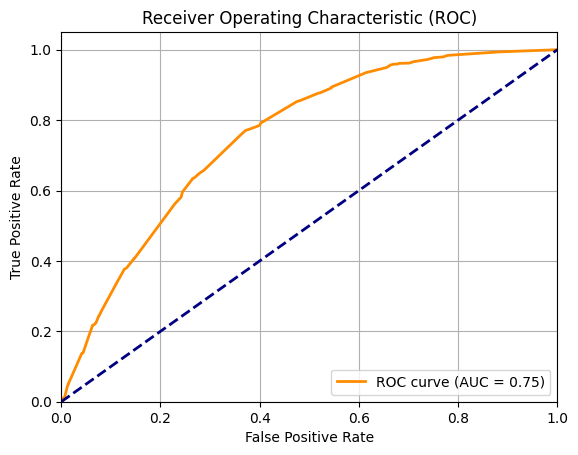

Tree depth 4
min_samples_leaf 12
goal                       0.346819
canceled                   0.162106
create_to_launch_days      0.156325
launched_at_yr             0.066001
name_len_clean             0.062207
launch_to_deadline_days    0.053475
launched_at_hr             0.036497
deadline_hr                0.024805
static_usd_rate            0.015595
TOPCOUNTRY                 0.009800
launched_at_day            0.009439
disable_communication      0.009109
created_at_day             0.008546
LaunchedTuesday            0.008223
launched_at_month          0.005955
deadline_month             0.005291
deadline_day               0.005287
world                      0.005225
app                        0.003874
blurb_len_clean            0.002884
created_at_hr              0.001047
created_at_month           0.001011
new                        0.000479
dtype: float64
Cross-validation scores: [0.66957364 0.7369186  0.77217644 0.79156568 0.64760058 0.72806592
 0.62966554 0.72903539 0.7377605

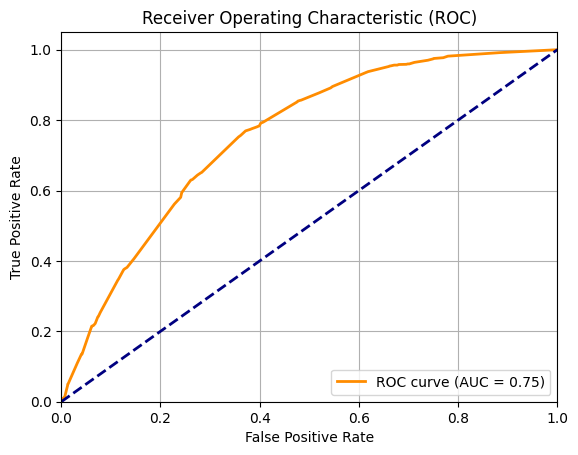

Tree depth 4
min_samples_leaf 13
goal                       0.345772
canceled                   0.162746
create_to_launch_days      0.157864
launched_at_yr             0.065070
name_len_clean             0.062452
launch_to_deadline_days    0.050788
launched_at_hr             0.037971
deadline_hr                0.024903
static_usd_rate            0.015657
TOPCOUNTRY                 0.009839
launched_at_day            0.009477
created_at_day             0.009203
disable_communication      0.009145
LaunchedTuesday            0.008255
launched_at_month          0.006497
deadline_month             0.005311
deadline_day               0.005296
world                      0.005160
app                        0.003889
blurb_len_clean            0.002895
created_at_hr              0.001329
new                        0.000481
dtype: float64
Cross-validation scores: [0.66182171 0.73885659 0.77266117 0.79108095 0.6509937  0.72952012
 0.630635   0.73097431 0.73776054 0.72709646]
Mean accuracy: 0.7171


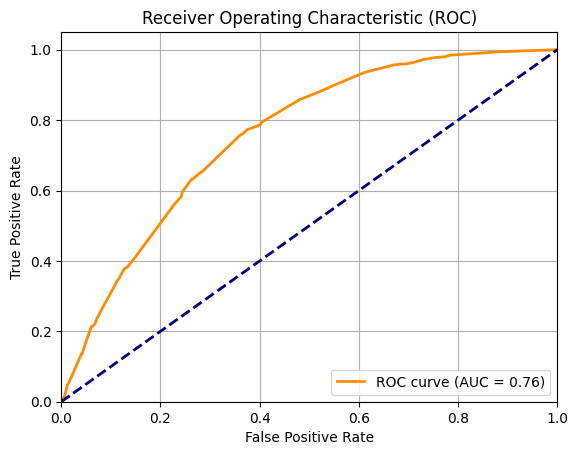

Tree depth 4
min_samples_leaf 14
goal                       0.346361
canceled                   0.162908
create_to_launch_days      0.158021
launched_at_yr             0.065135
name_len_clean             0.062515
launch_to_deadline_days    0.049950
launched_at_hr             0.038008
deadline_hr                0.024928
static_usd_rate            0.015672
TOPCOUNTRY                 0.009849
launched_at_day            0.009486
created_at_day             0.009212
disable_communication      0.009154
LaunchedTuesday            0.008263
launched_at_month          0.006503
deadline_month             0.005317
deadline_day               0.005302
world                      0.005092
app                        0.003893
blurb_len_clean            0.002898
created_at_hr              0.001052
new                        0.000481
dtype: float64
Cross-validation scores: [0.66375969 0.73837209 0.77266117 0.79108095 0.64808531 0.72952012
 0.62966554 0.72952012 0.73824527 0.72806592]
Mean accuracy: 0.7169


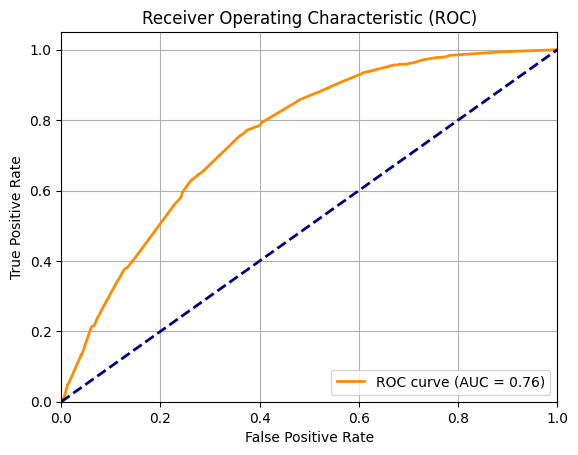

Tree depth 4
min_samples_leaf 2
goal                       0.306283
create_to_launch_days      0.153795
canceled                   0.136775
name_len_clean             0.058792
launch_to_deadline_days    0.056846
launched_at_yr             0.052569
launched_at_hr             0.035680
deadline_hr                0.027116
static_usd_rate            0.023086
deadline_day               0.016950
blurb_len_clean            0.015262
created_at_day             0.013370
created_at_hr              0.013245
deadline_month             0.012737
world                      0.012641
disable_communication      0.011552
launched_at_day            0.009549
LaunchedTuesday            0.009008
new                        0.007673
created_at_month           0.007477
TOPCOUNTRY                 0.006884
app                        0.004894
launched_at_month          0.004841
help                       0.002222
DeadlineWeekend            0.000753
dtype: float64
Cross-validation scores: [0.65746124 0.75726744 0.746

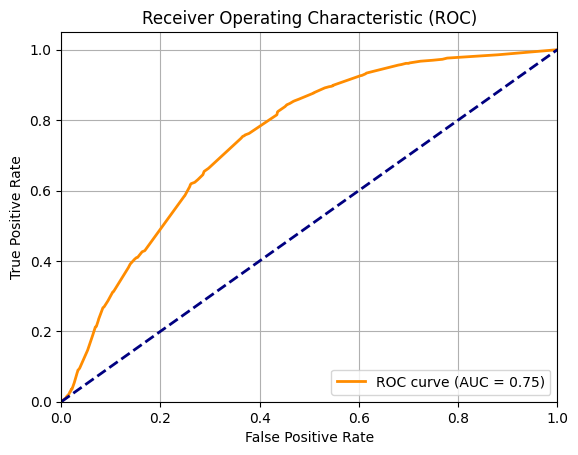

Tree depth 4
min_samples_leaf 3
goal                       0.308355
create_to_launch_days      0.153339
canceled                   0.137172
name_len_clean             0.058614
launch_to_deadline_days    0.057298
launched_at_yr             0.052688
launched_at_hr             0.037789
deadline_hr                0.026367
static_usd_rate            0.024939
deadline_month             0.018057
blurb_len_clean            0.015059
created_at_day             0.012015
created_at_hr              0.011735
disable_communication      0.011666
world                      0.011142
LaunchedTuesday            0.010302
deadline_day               0.009706
launched_at_day            0.009184
launched_at_month          0.008370
TOPCOUNTRY                 0.006951
created_at_month           0.005941
new                        0.005435
app                        0.004873
help                       0.002244
DeadlineWeekend            0.000760
dtype: float64
Cross-validation scores: [0.65794574 0.75629845 0.747

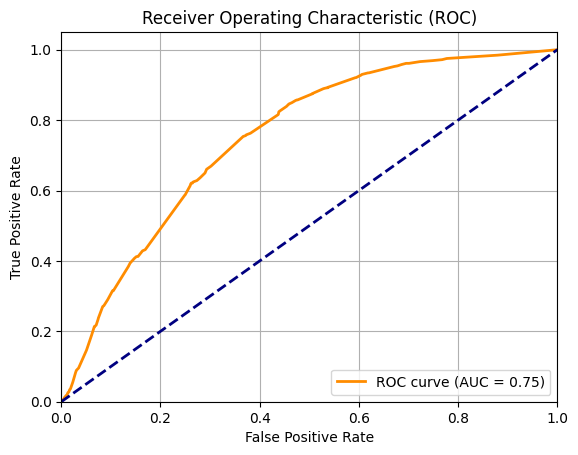

Tree depth 4
min_samples_leaf 4
goal                       0.311951
create_to_launch_days      0.149835
canceled                   0.138787
launch_to_deadline_days    0.060359
name_len_clean             0.059985
launched_at_yr             0.054607
launched_at_hr             0.033795
deadline_hr                0.029720
static_usd_rate            0.022371
created_at_hr              0.015546
deadline_month             0.014692
blurb_len_clean            0.012752
created_at_day             0.011855
disable_communication      0.011799
world                      0.011269
LaunchedTuesday            0.008799
deadline_day               0.008373
launched_at_day            0.007668
created_at_month           0.007572
launched_at_month          0.007330
TOPCOUNTRY                 0.007030
new                        0.006358
app                        0.004929
help                       0.001848
DeadlineWeekend            0.000769
dtype: float64
Cross-validation scores: [0.6627907  0.75678295 0.749

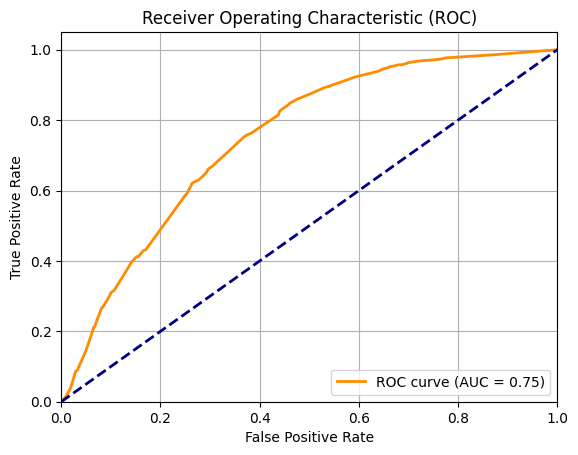

Tree depth 4
min_samples_leaf 5
goal                       0.315597
create_to_launch_days      0.148473
canceled                   0.140165
name_len_clean             0.058963
launch_to_deadline_days    0.057554
launched_at_yr             0.055282
launched_at_hr             0.041147
deadline_hr                0.028003
static_usd_rate            0.022086
created_at_hr              0.015410
disable_communication      0.011916
blurb_len_clean            0.011325
deadline_month             0.011040
LaunchedTuesday            0.010356
created_at_month           0.010083
world                      0.009558
deadline_day               0.009472
created_at_day             0.009332
launched_at_day            0.008490
TOPCOUNTRY                 0.008333
launched_at_month          0.007777
new                        0.005551
app                        0.003308
DeadlineWeekend            0.000777
dtype: float64
Cross-validation scores: [0.6623062  0.76114341 0.74890936 0.77023752 0.63742123 0.722733

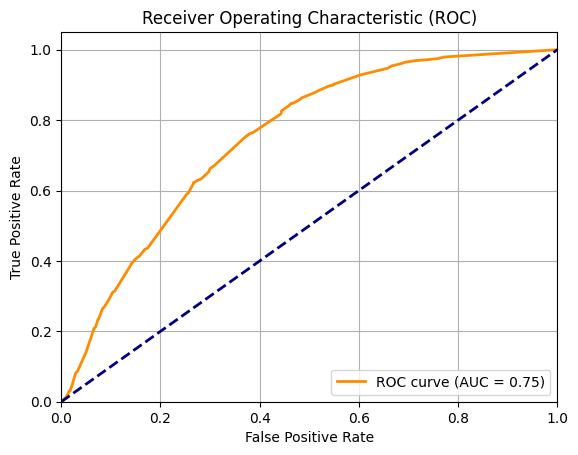

Tree depth 4
min_samples_leaf 6
goal                       0.317721
create_to_launch_days      0.148376
canceled                   0.139088
launch_to_deadline_days    0.059944
name_len_clean             0.059248
launched_at_yr             0.057794
launched_at_hr             0.039757
deadline_hr                0.027848
static_usd_rate            0.019173
created_at_hr              0.014498
disable_communication      0.011973
created_at_day             0.011923
world                      0.011206
deadline_day               0.011191
deadline_month             0.010902
blurb_len_clean            0.010566
launched_at_day            0.009460
LaunchedTuesday            0.008814
created_at_month           0.007907
TOPCOUNTRY                 0.007135
new                        0.007084
launched_at_month          0.004289
app                        0.003324
DeadlineWeekend            0.000780
dtype: float64
Cross-validation scores: [0.66085271 0.76065891 0.75036355 0.77072225 0.63887542 0.723703

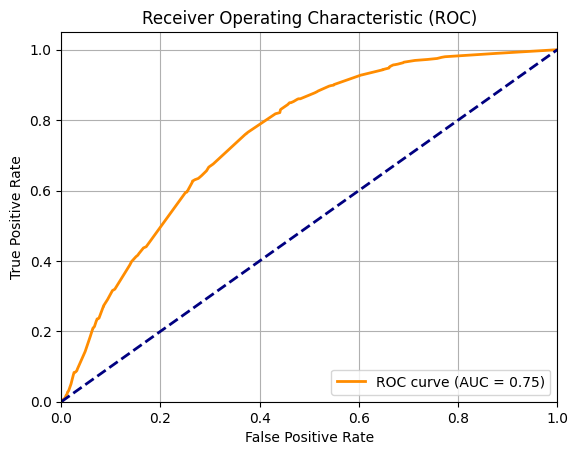

Tree depth 4
min_samples_leaf 7
goal                       0.319221
create_to_launch_days      0.147395
canceled                   0.139868
name_len_clean             0.059581
launched_at_yr             0.058253
launch_to_deadline_days    0.055235
launched_at_hr             0.040291
deadline_hr                0.028110
static_usd_rate            0.019280
created_at_hr              0.014602
deadline_month             0.014468
disable_communication      0.012041
world                      0.011269
blurb_len_clean            0.010985
launched_at_day            0.010269
deadline_day               0.009511
LaunchedTuesday            0.009383
created_at_day             0.008907
launched_at_month          0.007656
TOPCOUNTRY                 0.007175
new                        0.006908
created_at_month           0.005465
app                        0.003343
DeadlineWeekend            0.000785
dtype: float64
Cross-validation scores: [0.66182171 0.75872093 0.74939409 0.77266117 0.63839069 0.721764

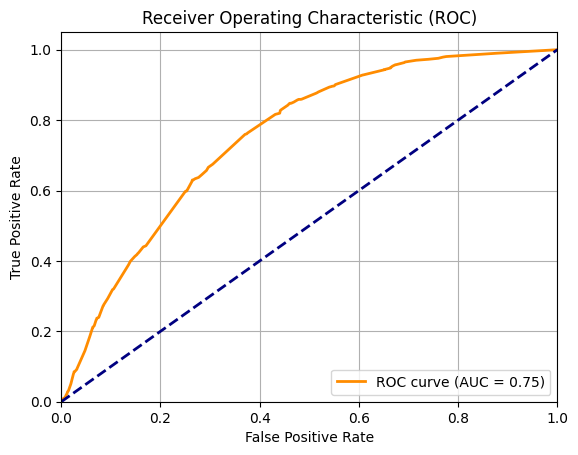

Tree depth 4
min_samples_leaf 8
goal                       0.319160
create_to_launch_days      0.148990
canceled                   0.141439
name_len_clean             0.059809
launched_at_yr             0.057833
launch_to_deadline_days    0.056484
launched_at_hr             0.035136
deadline_hr                0.030385
static_usd_rate            0.019497
created_at_hr              0.014731
deadline_month             0.014630
launched_at_day            0.012765
disable_communication      0.012176
world                      0.011185
blurb_len_clean            0.011077
created_at_day             0.009721
launched_at_month          0.008391
deadline_day               0.008118
TOPCOUNTRY                 0.007255
new                        0.006985
LaunchedTuesday            0.005938
created_at_month           0.004120
app                        0.003380
DeadlineWeekend            0.000794
dtype: float64
Cross-validation scores: [0.6623062  0.75872093 0.74939409 0.77169171 0.63402811 0.722249

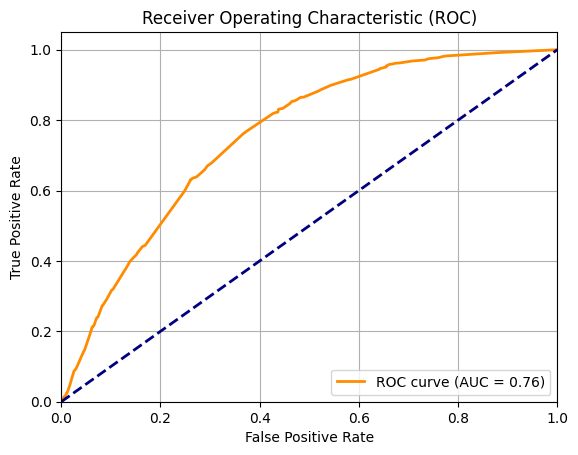

Tree depth 4
min_samples_leaf 9
goal                       0.321541
create_to_launch_days      0.149683
canceled                   0.142864
name_len_clean             0.061016
launched_at_yr             0.057121
launch_to_deadline_days    0.052202
launched_at_hr             0.037820
deadline_hr                0.028672
static_usd_rate            0.020866
deadline_month             0.016029
created_at_hr              0.013737
disable_communication      0.012299
launched_at_day            0.012257
world                      0.009486
created_at_day             0.008715
created_at_month           0.008587
deadline_day               0.007596
blurb_len_clean            0.007496
TOPCOUNTRY                 0.007328
new                        0.007056
launched_at_month          0.006121
LaunchedTuesday            0.005998
app                        0.003414
DeadlineWeekend            0.002097
dtype: float64
Cross-validation scores: [0.6623062  0.75872093 0.73582162 0.77169171 0.6369365  0.723218

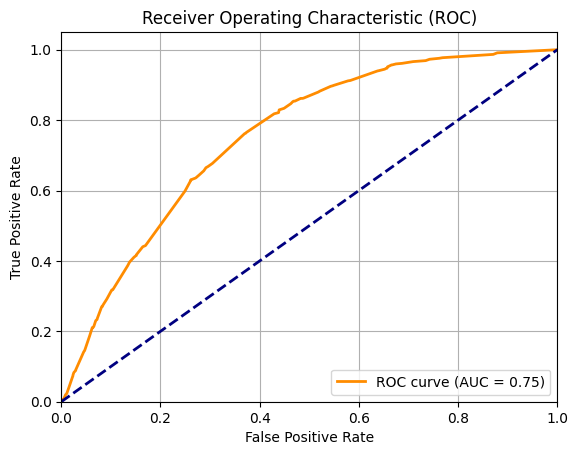

Tree depth 4
min_samples_leaf 10
goal                       0.324935
create_to_launch_days      0.149528
canceled                   0.144514
name_len_clean             0.062634
launched_at_yr             0.058839
launch_to_deadline_days    0.055692
launched_at_hr             0.037559
deadline_hr                0.027126
static_usd_rate            0.021626
deadline_month             0.013523
disable_communication      0.012441
created_at_hr              0.012421
launched_at_day            0.009566
world                      0.009462
created_at_day             0.009289
launched_at_month          0.008662
deadline_day               0.008238
TOPCOUNTRY                 0.007413
new                        0.007137
LaunchedTuesday            0.006067
blurb_len_clean            0.005933
app                        0.003454
created_at_month           0.003131
DeadlineWeekend            0.000811
dtype: float64
Cross-validation scores: [0.66133721 0.75629845 0.73485216 0.77266117 0.643238   0.72661

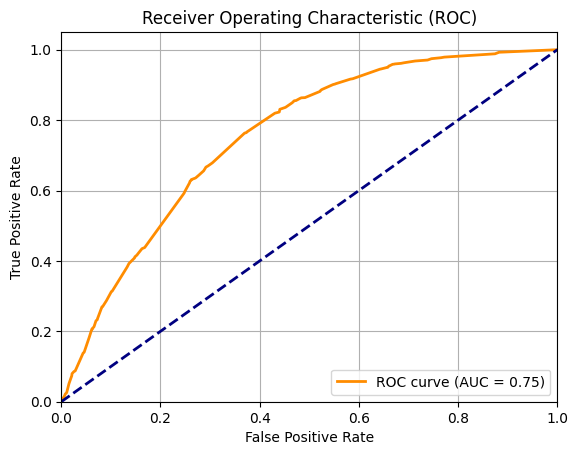

Tree depth 4
min_samples_leaf 11
goal                       0.324237
create_to_launch_days      0.150819
canceled                   0.144920
name_len_clean             0.062965
launched_at_yr             0.059004
launch_to_deadline_days    0.052888
launched_at_hr             0.036330
deadline_hr                0.029838
static_usd_rate            0.023979
deadline_month             0.013818
disable_communication      0.012476
created_at_day             0.011889
launched_at_day            0.010834
created_at_hr              0.010657
launched_at_month          0.010298
deadline_day               0.008262
TOPCOUNTRY                 0.007434
LaunchedTuesday            0.007351
world                      0.007321
new                        0.005483
app                        0.003463
created_at_month           0.002895
blurb_len_clean            0.002840
dtype: float64
Cross-validation scores: [0.66182171 0.75678295 0.73485216 0.77508483 0.64420746 0.72709646
 0.63257392 0.73000485 0.7348521

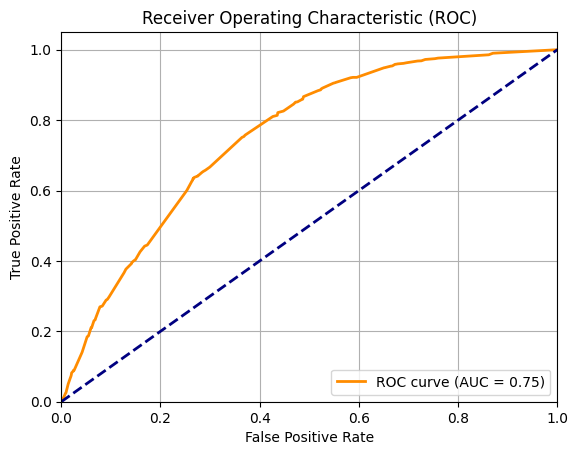

Tree depth 4
min_samples_leaf 12
goal                       0.327822
create_to_launch_days      0.149556
canceled                   0.146187
name_len_clean             0.062371
launched_at_yr             0.059520
launch_to_deadline_days    0.052110
launched_at_hr             0.037097
deadline_hr                0.028323
static_usd_rate            0.023629
disable_communication      0.012585
created_at_hr              0.012151
deadline_day               0.009799
created_at_day             0.009536
launched_at_day            0.009507
deadline_month             0.009371
TOPCOUNTRY                 0.008838
launched_at_month          0.008415
LaunchedTuesday            0.007415
world                      0.007274
new                        0.005531
created_at_month           0.005282
app                        0.003494
blurb_len_clean            0.002601
DeadlineWeekend            0.001587
dtype: float64
Cross-validation scores: [0.66133721 0.75678295 0.73776054 0.76781386 0.64808531 0.72079

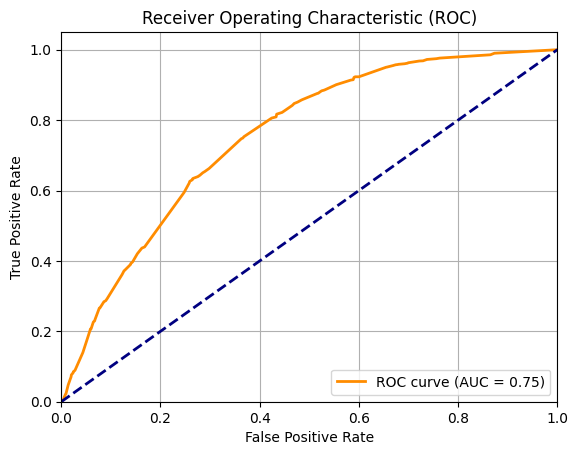

Tree depth 4
min_samples_leaf 13
goal                       0.328724
create_to_launch_days      0.150763
canceled                   0.146951
name_len_clean             0.062697
launched_at_yr             0.058755
launch_to_deadline_days    0.049904
launched_at_hr             0.040745
deadline_hr                0.029545
static_usd_rate            0.022547
disable_communication      0.012650
created_at_hr              0.011859
TOPCOUNTRY                 0.010449
launched_at_day            0.010212
deadline_day               0.009840
created_at_day             0.008806
deadline_month             0.007700
LaunchedTuesday            0.007454
world                      0.007235
launched_at_month          0.006619
created_at_month           0.004164
new                        0.003969
app                        0.003512
blurb_len_clean            0.003304
DeadlineWeekend            0.001595
dtype: float64
Cross-validation scores: [0.65697674 0.75436047 0.73969947 0.76732913 0.6509937  0.72273

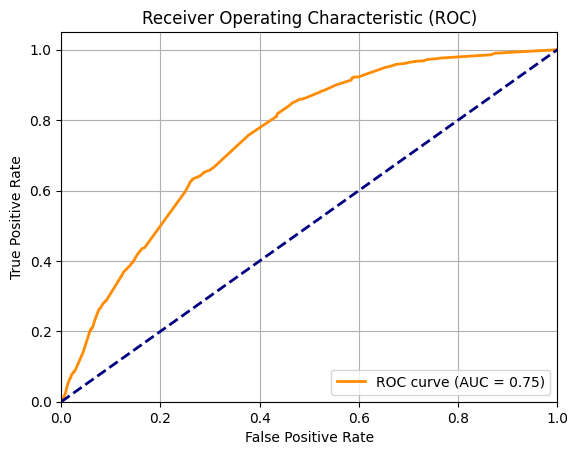

Tree depth 4
min_samples_leaf 14
goal                       0.330377
create_to_launch_days      0.150919
canceled                   0.147433
name_len_clean             0.062902
launched_at_yr             0.058947
launch_to_deadline_days    0.051825
launched_at_hr             0.036057
deadline_hr                0.028332
static_usd_rate            0.022621
disable_communication      0.012692
created_at_hr              0.011967
created_at_day             0.010765
TOPCOUNTRY                 0.010484
launched_at_day            0.009588
deadline_month             0.007782
deadline_day               0.007762
LaunchedTuesday            0.007478
world                      0.007261
created_at_month           0.007194
launched_at_month          0.005885
new                        0.003982
app                        0.003523
blurb_len_clean            0.002623
DeadlineWeekend            0.001600
dtype: float64
Cross-validation scores: [0.66085271 0.75339147 0.73921474 0.76781386 0.64663112 0.72273

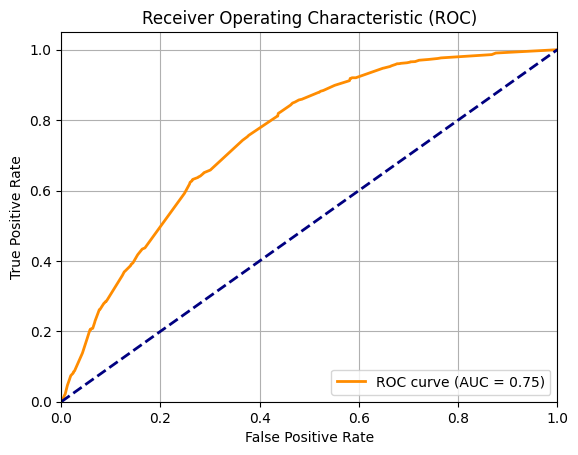

In [28]:
model_score_stats = []

for depth in range(2, 10):
    for min_samples_leaf in range(2, 15):
        print(f"Tree depth {i}")
        print(f"min_samples_leaf {min_samples_leaf}")

        clf = DecisionTreeClassifier(max_depth=depth, random_state=42, criterion='gini', min_samples_leaf=min_samples_leaf)
        clf.fit(X_train, y_train)

        cv_scores = cross_val_score(clf, X, y, cv=10)

        #examine the feature importance
        importances = clf.feature_importances_
        feature_ranks = pd.Series(importances, index=X.columns).sort_values(ascending=False)
        filtered_ranks = feature_ranks[feature_ranks > 0]
        print(filtered_ranks)
        #for index, value in zip(feature_ranks.index, feature_ranks.values):
        #    print(index, value)
        #print(feature_ranks)
        #split_feature_index = clf.tree_.feature[0]
        #print("Split on feature:", X.columns[split_feature_index])

        model_score_stats.append({"model": clf, "depth": i, "min_samples_leaf":min_samples_leaf, "mean_score": cv_scores.mean(), "score_std":cv_scores.std()})

        print(f"Cross-validation scores: {cv_scores}")
        print(f"Mean accuracy: {cv_scores.mean():.4f}")
        print(f"Standard deviation of accuracy: {cv_scores.std():.4f}")

        y_scores = clf.predict_proba(X_test)[:, 1]  # Get probability for the positive class

        # Compute ROC curve and AUC
        fpr, tpr, thresholds = roc_curve(y_test, y_scores)
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Chance line
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC)')
        plt.legend(loc='lower right')
        plt.grid()
        plt.show()
            

In [25]:
max_score = max(model_score_stats, key=lambda x: x['mean_score'])
min_std = min(model_score_stats, key=lambda x: x['score_std'])

print(f"maximum average score parameters {max_score}")
print(f"minimum score standard deviation parameters {min_std}")

maximum average score parameters {'model': DecisionTreeClassifier(max_depth=3, random_state=42), 'depth': 4, 'min_sample_split': 2, 'mean_score': np.float64(0.7225677965783254), 'score_std': np.float64(0.029910232490281213)}
minimum score standard deviation parameters {'model': DecisionTreeClassifier(max_depth=1, random_state=42), 'depth': 4, 'min_sample_split': 2, 'mean_score': np.float64(0.7083171756341897), 'score_std': np.float64(0.00018790924785288627)}


### Test Results ###

In cross validation testing, it appears that a tree depth of 12 has the highest average score for the 10 folds. A depth of 19 has the minimum standard deviation among the scores. The standard deviation in both cases is very low.

After dropping `usd_pledged`, the tree depth values changed to 7 and 11 respectively.

After removing all features that can leak, the depth values changed to 3 and 1 respectively. Highest test score of 0.72.

Changed to use entropy instead of gini index. No change to score. Tried log_loss. No change to score.

Tried different numbers for min_sample_split but it seems to have minimal impact. Maximum score achieved with depth 4 and min_sample_split of 2.



### Adaboost Decision Trees ###

Rerun the above tests but with Adaboost.

Initial run with:
`clf_Adaboost = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)`

results in a mean score of 0.7367 and AUC score of 0.81.

goal                       0.237120
create_to_launch_days      0.133265
canceled                   0.104913
launch_to_deadline_days    0.090400
launched_at_yr             0.065461
name_len_clean             0.058146
launched_at_hr             0.040320
static_usd_rate            0.031164
deadline_hr                0.028628
created_at_hr              0.025778
deadline_day               0.021648
new                        0.020418
blurb_len_clean            0.016259
created_at_day             0.015407
launched_at_day            0.014891
world                      0.014709
disable_communication      0.014267
deadline_month             0.012243
app                        0.011107
created_at_month           0.010190
TOPCOUNTRY                 0.008539
launched_at_month          0.007045
help                       0.006892
LaunchedTuesday            0.006136
DeadlineWeekend            0.005054
dtype: float64
Cross-validation scores: [0.69331395 0.76405039 0.78768783 0.79253514 0.67329132 0.76

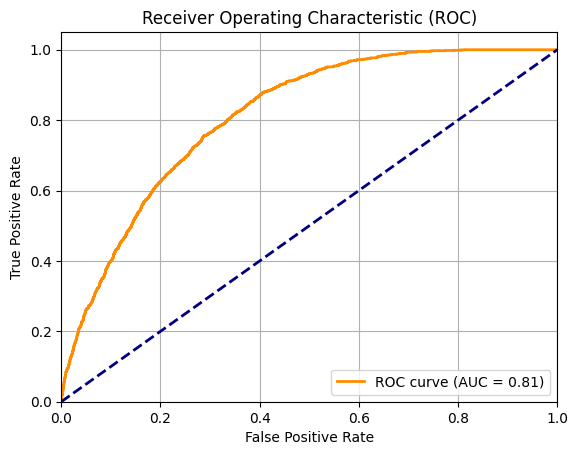

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

clf_Adaboost = GradientBoostingClassifier(n_estimators=200, max_depth=4, learning_rate=0.15, random_state=42)
clf_Adaboost.fit(X_train, y_train)

cv_scores = cross_val_score(clf_Adaboost, X, y, cv=10)

#examine the feature importance
importances = clf_Adaboost.feature_importances_
feature_ranks = pd.Series(importances, index=X.columns).sort_values(ascending=False)
filtered_ranks = feature_ranks[feature_ranks > 0]
print(filtered_ranks)
#for index, value in zip(feature_ranks.index, feature_ranks.values):
#    print(index, value)
#print(feature_ranks)
#split_feature_index = clf.tree_.feature[0]
#print("Split on feature:", X.columns[split_feature_index])

#model_score_stats.append({"model": clf_Adaboost, "depth": i, "min_sample_split":min_sample_split, "mean_score": cv_scores.mean(), "score_std":cv_scores.std()})

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation of accuracy: {cv_scores.std():.4f}")

y_scores = clf_Adaboost.predict_proba(X_test)[:, 1]  # Get probability for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Chance line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Best n_estimators: 350


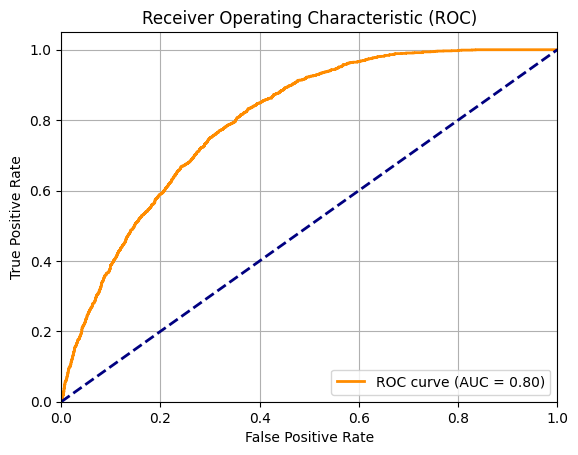

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [350]}
grid = GridSearchCV(GradientBoostingClassifier(learning_rate=0.15, max_depth=4), params, cv=10)
grid.fit(X_train, y_train)
print("Best n_estimators:", grid.best_params_['n_estimators'])

y_scores = grid.predict_proba(X_test)[:, 1]  # Get probability for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Chance line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()